1. Age: Usia dalam tahun (numerik);
2. Sex: 1: Laki-laki, 0: Perempuan;
3. Chest pain type (CP): (a) typical angina (1: angina), (b) atypical angina (2: abnang), (c) non-anginal pain (3: notang), (d) asymptomatic (4: asympt). Pengertian secara medis :
a. Typical angina adalah kondisi rekam medis pasien menunjukkan gejala umum nyeri dada
sehingga kemungkinan memiliki penyumbatan arteri koroner yang tinggi.
b. Atypical angina adalah kondisi dimana gejala pasien tidak rinci sehingga kemungkinan
penyumbatan lebih rendah.
c. Non-anginal pain adalah rasa sakit yang menusuk seperti pisau atau kondisi menyakitkan yang
dapat berlangsung dalam jangka waktu pendek atau panjang
d. Asymptomatic pain tidak menunjukkan gejala penyakit dan kemungkinan tidak akan
menyebabkan atau menunjukkan gejala penyakit.
4. Trestbps: resting blood pressure pasien dalam mm Hg pada saat masuk rumah sakit
(numerik);
5. Chol: Serum kolesterol dalam mg/dl (numerik);
6. Fbs: Ukuran boolean yang menunjukkan apakah fasting blood sugar lebih besar dari 120 mg/dl
atau tidak: (1: True; 0: false);
7. Restecg: Hasil ECG selama istirahat : 0: normal, 1: abnormal (memiliki kelainan gelombang
ST-T), 2: hipertrofi ventrikel;
8. Thalac: detak jantung maksimum yang dicapai (numerik);
9. Exang: Ukuran boolean yang menunjukkan apakah latihan angina induksi telah terjadi (1: ya, 0:
tidak);
10. Oldpeak: segmen ST yang diperoleh dari latihan relatif terhadap istirahat (numerik);
11. Slope: kemiringan segmen ST untuk latihan maksimum (puncak). Terdapat tiga jenis nilai yaitu 1:
upsloping, 2: flat, 3: downsloping;
12. Ca: jumlah vessel utama yang diwarnai oleh fluoroskopi (numerik);
13. Thal: status jantung (3: normal, 6: cacat tetap, 7:cacat reversibel);
14. The class attributes: 0: sehat dan 1: sakit.

#1. DATA PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Logistic regression classification
import warnings
from sklearn.exceptions import ConvergenceWarning

# Mengabaikan ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

df = pd.read_csv('heart.csv')

In [ ]:
#5 data teratas
df.head(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

pada tabel di atas terdapat output 5 data teratas dari dataset yang digunakan, karena pada perintah sebelumnya menginginkan output terdapat 5 tabel teratas.

In [ ]:
#5 data terbawah
df.tail(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

pada tabel di atas terdapat output 5 data terbawah dari dataset yang digunakan, karena pada perintah sebelumnya menginginkan output terdapat 5 tabel terbawah.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


data di atas menunjukkan berbagai macam data type yg ada pada dataset tersebut. Untuk kolom age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal, dan target merupakan tipe data integer, sedangkan kolom oldpeak merupakan tipe data float. Pada output tersebut terlihat bahwa tidak ada missing value, maka tidak perlu penangan lebih lanjut untuk missing value.

In [ ]:
df.shape

(1025, 14)

pada dataset 'Heart Disease' terdapat 1025 baris dan 14 kolom.

In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= age =================


age
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64


============= sex =================


sex
1    713
0    312
Name: count, dtype: int64


============= cp =================


cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64


============= trestbps =================


trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3
164      3
156      3
101      3
Name: count, dtype: int64


============= chol =================


chol
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: count, Length: 152, dtype: int64


============= fbs =================


fbs
0    872
1    153
Name: count, dtype: int64


============= restecg =================


restecg
1    513
0    497
2     15
Name: count, dtype: int64


============= thalach =================


thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64


============= exang =================


exang
0    680
1    345
Name: count, dtype: int64


============= oldpeak =================


oldpeak
0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: count, dtype: int64


============= slope =================


slope
1    482
2    469
0     74
Name: count, dtype: int64


============= ca =================


ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


============= thal =================


thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64


============= target =================


target
1    526
0    499
Name: count, dtype: int64

syntax dan output di atas bertujuan untuk menganalisis dataset secara cepat dengan cara melihat distribusi nilai dalam setiap kolom, yang dapat membantu dalam pemahaman awal tentang karakteristik data.

##1.1 Missing Value

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Berdasarkan output yang ditampilkan terlihat bahwa tidak terdapat missing value untuk setiap kolom pada dataset "Heart Disease".

##1.2 Duplicate


In [ ]:
duplikat_seluruh_baris = df[df.duplicated()]
print("Duplikat di seluruh baris data:")
print(duplikat_seluruh_baris)

Duplikat di seluruh baris data:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2

Setelah dilakukannya pengecekan untuk apakah terdapat duplikasi pada dataset, terlihat bahwa terdapat data duplikat sebanyak 723 baris pada dataset 'Heart Disease'.

In [ ]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

untuk kasus ini saya tidak melakukan drop data untuk data duplikat, karena hal tersebut wajar jika terdapat duplikat, soalmya 1 orang bisa jadi ada yang sama dikarenakan pada dataset 'Heart Disease' tidak terdapat kolom 'user id' yang bisa membedakan satu user dengan user lainnya (data unik), kecuali terdapat 1 user yang ada lebih dari 1 data, maka harus dilakukan drop data untuk menghilangkan data duplikasi.

##1.3 Outliers


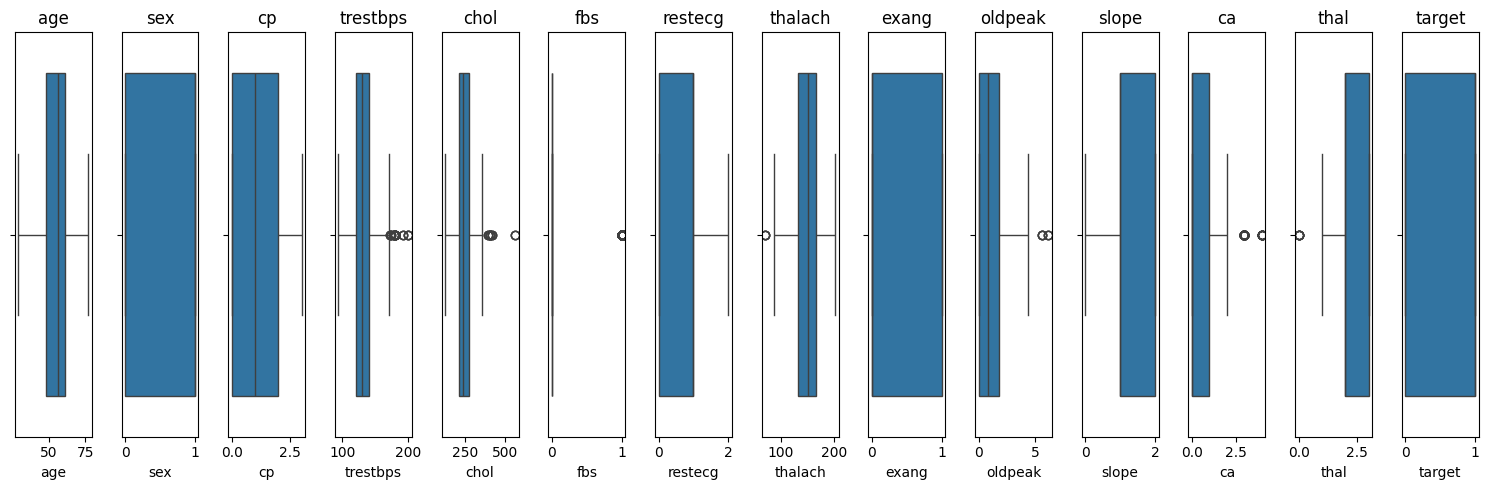

In [ ]:
import seaborn as sns
# Membuat subplot untuk setiap kolom
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

# Menggambar boxplot untuk setiap kolom menggunakan seaborn
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

# Menampilkan plot
plt.tight_layout()
plt.show()

terdapat outliers pada kolom 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal'. Tetapi pada dataset 'Heart Disease' ini saya membiarkan outliers yang ada, karena hal tersebut masih dibutuhkan dalam analisis selanjutnya.

In [ ]:
# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk kolom "Sales"
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)

# Menghitung rentang interkuartil (IQR) untuk kolom "Sales"
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah untuk outlier
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter untuk menandai baris dengan outlier pada kolom "Sales"
outlier_filter = (df['trestbps'] < lower_bound) | (df['trestbps'] > upper_bound)

# Menghitung banyaknya outlier yang dihapus
print("Jumlah outlier yang dihapus:", len(df[outlier_filter]))

Jumlah outlier yang dihapus: 30


<Axes: xlabel='trestbps'>

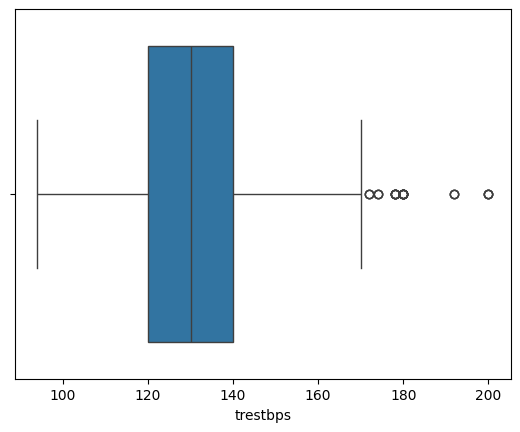

In [ ]:
import seaborn as sns
sns.boxplot(data = df, x = 'trestbps')

<Axes: xlabel='age', ylabel='Count'>

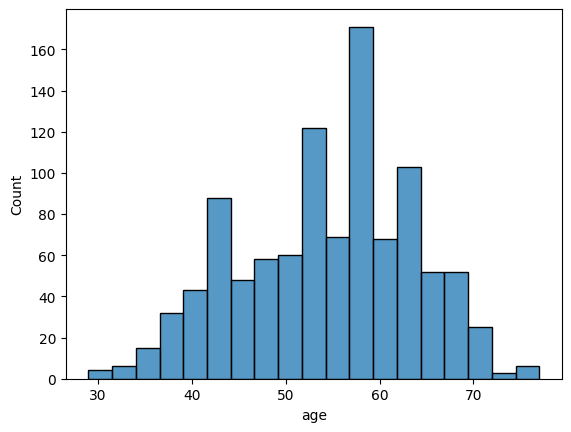

In [ ]:
sns.histplot(df['age'])

untuk menampilkan plot histogram pada kolom 'age' di dataframe.

##1.4 Imbalance Data

In [ ]:
df['target'].value_counts(normalize=True) * 100

target
1    51.317073
0    48.682927
Name: proportion, dtype: float64

<Axes: xlabel='target', ylabel='count'>

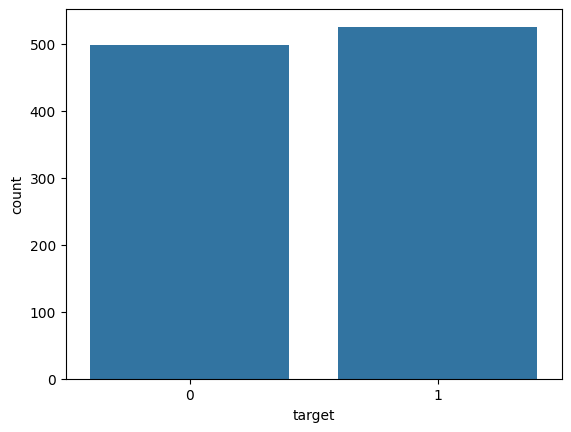

In [ ]:
# Menampilkan jumlah data per target class
sns.countplot(x=df['target'])

berdasarkan output, dapat dikatakan bahwa untuk kolom 'target' sudah seimbang(balance) datanya, karena batas perbandingan untuk suatu data dikatakan tidak seimbang adalah 70% : 30%. Maka untuk kasus imbalance data tidak perlu handling data.

## 1.5 Encoding
Untuk fitur encoding tidak diperlukan dalam pengolahan dataset 'Heart Disease' ini, karena data kategorikalnya sudah berupa bilangan biner 1 dan 0 (One-Hot Encoding)

# 2. Exploratory Data Analysis (EDA)

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
# Mengekstrak informasi tentang tipe data dan karakteristik fitur
features_info = []

for column in df.columns:
    feature_info = {}
    feature_info['Feature'] = column
    feature_info['Type'] = df[column].dtype

    # Mengidentifikasi tipe data: nominal, ordinal, atau numerical
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    if num_unique_values == 2:
        feature_info['Data Type'] = 'Binary'
    elif df[column].dtype == 'object':
        feature_info['Data Type'] = 'Nominal'
    elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Melakukan pengujian sederhana untuk menentukan apakah data ordinal atau numerical
        if num_unique_values < len(df) * 0.05:
            feature_info['Data Type'] = 'Ordinal'
        else:
            feature_info['Data Type'] = 'Numerical'

    features_info.append(feature_info)

# Menampilkan informasi tentang setiap fitur
features_info_df = pd.DataFrame(features_info)
print(features_info_df)

     Feature     Type  Data Type
0        age    int64    Ordinal
1        sex    int64     Binary
2         cp    int64    Ordinal
3   trestbps    int64    Ordinal
4       chol    int64  Numerical
5        fbs    int64     Binary
6    restecg    int64    Ordinal
7    thalach    int64  Numerical
8      exang    int64     Binary
9    oldpeak  float64    Ordinal
10     slope    int64    Ordinal
11        ca    int64    Ordinal
12      thal    int64    Ordinal
13    target    int64     Binary


a. untuk kolom 'sex', 'fbs', 'exang', 'target' termasuk dalam feature nominal (binary), karena memiliki nilai yang merepresentasikan kategori atau label tanpa adanya urutan tertentu.

b. untuk kolom 'age', 'cp', 'trestbps', 'restecg', 'oldpeak', 'slope', 'ca', 'thal' termasuk dalam feature ordinal, karena memiliki nilai yang dapat diurutkan atau memiliki tingkatan, tetapi jarak antara nilai tidak memiliki interpretasi yang jelas.

c. sedangkan untuk kolom 'chol', 'thalach' termasuk dalam feature numerical, karena memiliki nilai dalam bentuk angka dan dapat diukur atau dihitung.



In [ ]:
df[['age','trestbps','chol','thalach','oldpeak']].describe()

age     trestbps        chol      thalach      oldpeak
count  1025.000000  1025.000000  1025.00000  1025.000000  1025.000000
mean     54.434146   131.611707   246.00000   149.114146     1.071512
std       9.072290    17.516718    51.59251    23.005724     1.175053
min      29.000000    94.000000   126.00000    71.000000     0.000000
25%      48.000000   120.000000   211.00000   132.000000     0.000000
50%      56.000000   130.000000   240.00000   152.000000     0.800000
75%      61.000000   140.000000   275.00000   166.000000     1.800000
max      77.000000   200.000000   564.00000   202.000000     6.200000

output di atas menampilkan count (jumlah data) sebanyak 1025 baris, mean (rata-rata), std (standar deviasi), min (nilai minimum), quartile (kuartil), dan max (nilai maksimum) untuk setiap kolom numerik dalam DataFrame.

*Mean (Rata-Rata)*
Digunakan ketika data memiliki distribusi normal atau hampir normal.
Rentan terhadap nilai ekstrem (outlier), yang dapat memengaruhi keakuratan sebagai representasi sentral dari data.

*Median*
Digunakan ketika data memiliki distribusi yang tidak simetris atau ada keberadaan outlier.
Cocok untuk digunakan dengan data yang memiliki distribusi skew (miring).

*Modus*
Digunakan ketika ingin mengetahui frekuensi kemunculan nilai tertentu dalam kumpulan data.
Dapat digunakan dengan baik bahkan jika data tidak memiliki struktur distribusi tertentu.

#### Summaries Statistical Descriptive

In [ ]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

### a. penjelasan kolom 'age' untuk statistika deskriptif
* count : pada kolom 'age' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'age' adalah 54.434146
* std : standar deviasi pada kolom 'age' adalah 9.072290 tahun
* min : nilai minimum pada kolom 'age' adalah 29 tahun.
* 25% : Q1 (quartile 1) untuk kolom 'age' adalah 48 tahun.
* 50% : median untuk kolom 'age' adalah 56 tahun.
* 75% : Q3 (quartile 3) untuk kolom 'age' adalah 61 tahun.
* max : nilai maksimum pada kolom 'age' adlaah 77 tahun.

### b. penjelasan kolom 'sex' untuk statistika deskriptif
* count : pada kolom 'sex' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'sex' adalah 0.695610.
* std : standar deviasi pada kolom 'sex' adalah 0.460373.
* min : nilai minimum pada kolom 'sex' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'sex' adalah 0.000000.
* 50% : median untuk kolom 'sex' adalah 1.000000.
* 75% : Q3 (quartile 3) untuk kolom 'sex' adalah 1.000000.
* max : nilai maksimum pada kolom 'sex' adlaah 1.000000.

### c. penjelasan kolom 'cp' untuk statistika deskriptif
* count : pada kolom 'cp' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'cp' adalah 0.942439.
* std : standar deviasi pada kolom 'cp' adalah 1.029641.
* min : nilai minimum pada kolom 'cp' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'cp' adalah 0.000000.
* 50% : median untuk kolom 'cp' adalah 1.000000.
* 75% : Q3 (quartile 3) untuk kolom 'cp' adalah 2.000000.
* max : nilai maksimum pada kolom 'cp' adlaah 3.000000.

### d. penjelasan kolom 'trestbps' untuk statistika deskriptif
* count : pada kolom 'trestbps' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'trestbps' adalah 131.611707.
* std : standar deviasi pada kolom 'trestbps' adalah 17.516718.
* min : nilai minimum pada kolom 'trestbps' adalah 94.000000.
* 25% : Q1 (quartile 1) untuk kolom 'trestbps' adalah 120.000000.
* 50% : median untuk kolom 'trestbps' adalah 130.000000.
* 75% : Q3 (quartile 3) untuk kolom 'trestbps' adalah 140.000000.
* max : nilai maksimum pada kolom 'trestbps' adlaah 200.000000.

### e. penjelasan kolom 'chol' untuk statistika deskriptif
* count : pada kolom 'chol' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'chol' adalah 246.00000.
* std : standar deviasi pada kolom 'chol' adalah 51.59251.
* min : nilai minimum pada kolom 'chol' adalah 126.000000.
* 25% : Q1 (quartile 1) untuk kolom 'chol' adalah 211.000000.
* 50% : median untuk kolom 'chol' adalah 240.000000.
* 75% : Q3 (quartile 3) untuk kolom 'chol' adalah 275.000000.
* max : nilai maksimum pada kolom 'chol' adlaah 564.000000.

### f. penjelasan kolom 'fbs' untuk statistika deskriptif
* count : pada kolom 'fbs' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'fbs' adalah 0.149268.
* std : standar deviasi pada kolom 'fbs' adalah 0.356527.
* min : nilai minimum pada kolom 'fbs' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'fbs' adalah 0.000000.
* 50% : median untuk kolom 'fbs' adalah 0.000000.
* 75% : Q3 (quartile 3) untuk kolom 'fbs' adalah 0.000000.
* max : nilai maksimum pada kolom 'fbs' adlaah 1.000000.

### g. penjelasan kolom 'restecg' untuk statistika deskriptif
* count : pada kolom 'restecg' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'restecg' adalah 0.529756.
* std : standar deviasi pada kolom 'restecg' adalah 0.527878.
* min : nilai minimum pada kolom 'restecg' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'restecg' adalah 0.000000.
* 50% : median untuk kolom 'restecg' adalah 1.000000.
* 75% : Q3 (quartile 3) untuk kolom 'restecg' adalah 1.000000.
* max : nilai maksimum pada kolom 'restecg' adlaah 2.000000.

### h. penjelasan kolom 'thalach' untuk statistika deskriptif
* count : pada kolom 'thalach' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'thalach' adalah 149.114146.
* std : standar deviasi pada kolom 'thalach' adalah 23.005724.
* min : nilai minimum pada kolom 'thalach' adalah 71.000000.
* 25% : Q1 (quartile 1) untuk kolom 'thalach' adalah 132.000000.
* 50% : median untuk kolom 'thalach' adalah 152.000000.
* 75% : Q3 (quartile 3) untuk kolom 'thalach' adalah 166.000000.
* max : nilai maksimum pada kolom 'thalach' adlaah 202.000000.

### i. penjelasan kolom 'exang' untuk statistika deskriptif
* count : pada kolom 'exang' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'exang' adalah 0.336585.
* std : standar deviasi pada kolom 'exang' adalah 0.472772.
* min : nilai minimum pada kolom 'exang' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'exang' adalah 0.000000.
* 50% : median untuk kolom 'exang' adalah 0.000000.
* 75% : Q3 (quartile 3) untuk kolom 'exang' adalah 1.000000.
* max : nilai maksimum pada kolom 'exang' adlaah 1.000000.

### j. penjelasan kolom 'oldpeak' untuk statistika deskriptif
* count : pada kolom 'oldpeak' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'oldpeak' adalah 1.071512.
* std : standar deviasi pada kolom 'oldpeak' adalah 1.175053.
* min : nilai minimum pada kolom 'oldpeak' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'oldpeak' adalah 0.000000.
* 50% : median untuk kolom 'oldpeak' adalah 0.800000.
* 75% : Q3 (quartile 3) untuk kolom 'oldpeak' adalah 1.800000.
* max : nilai maksimum pada kolom 'oldpeak' adlaah 6.200000.

### k. penjelasan kolom 'slope' untuk statistika deskriptif
* count : pada kolom 'slope' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'slope' adalah 1.385366.
* std : standar deviasi pada kolom 'slope' adalah 0.617755.
* min : nilai minimum pada kolom 'slope' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'slope' adalah 1.000000.
* 50% : median untuk kolom 'slope' adalah 1.000000.
* 75% : Q3 (quartile 3) untuk kolom 'slope' adalah 2.000000.
* max : nilai maksimum pada kolom 'slope' adlaah 2.000000.

### l. penjelasan kolom 'ca' untuk statistika deskriptif
* count : pada kolom 'ca' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'ca' adalah 0.754146.
* std : standar deviasi pada kolom 'ca' adalah 1.030798.
* min : nilai minimum pada kolom 'ca' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'ca' adalah 0.000000.
* 50% : median untuk kolom 'ca' adalah 0.000000.
* 75% : Q3 (quartile 3) untuk kolom 'ca' adalah 1.000000.
* max : nilai maksimum pada kolom 'ca' adlaah 4.000000.

### m. penjelasan kolom 'thal' untuk statistika deskriptif
* count : pada kolom 'thal' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'thal' adalah 2.323902.
* std : standar deviasi pada kolom 'thal' adalah 0.620660.
* min : nilai minimum pada kolom 'thal' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'thal' adalah 2.000000.
* 50% : median untuk kolom 'thal' adalah 2.000000.
* 75% : Q3 (quartile 3) untuk kolom 'thal' adalah 3.000000.
* max : nilai maksimum pada kolom 'thal' adlaah 3.000000.

### n. penjelasan kolom 'target' untuk statistika deskriptif
* count : pada kolom 'target' jumlah baris nya adalah 1025 baris.
* mean : mean untuk kolom 'target' adalah 0.513171.
* std : standar deviasi pada kolom 'target' adalah 0.500070.
* min : nilai minimum pada kolom 'target' adalah 0.000000.
* 25% : Q1 (quartile 1) untuk kolom 'target' adalah 0.000000.
* 50% : median untuk kolom 'target' adalah 1.000000.
* 75% : Q3 (quartile 3) untuk kolom 'target' adalah 1.000000.
* max : nilai maksimum pada kolom 'target' adlaah 1.000000.

##2.1 Univariate Analysis

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

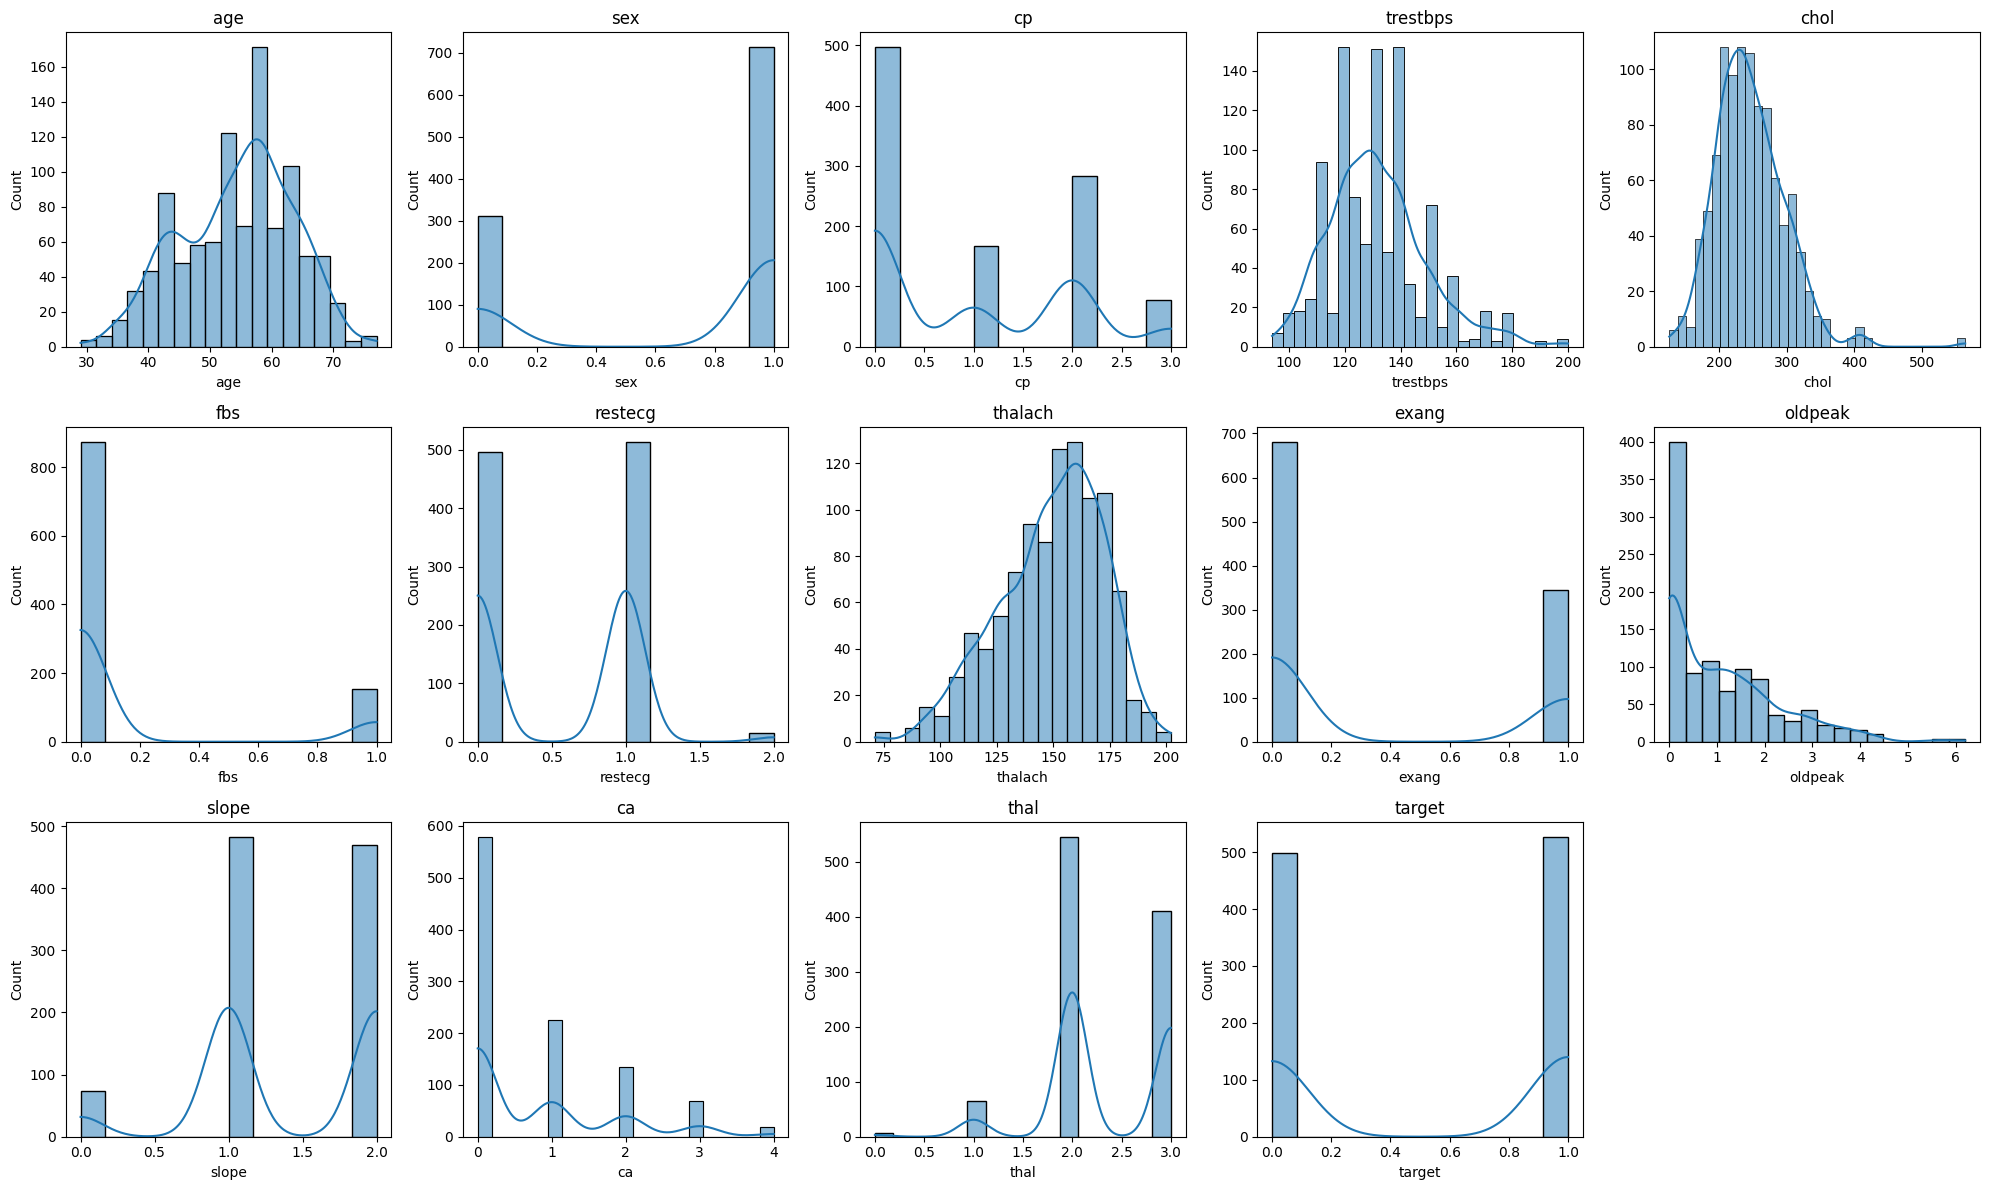

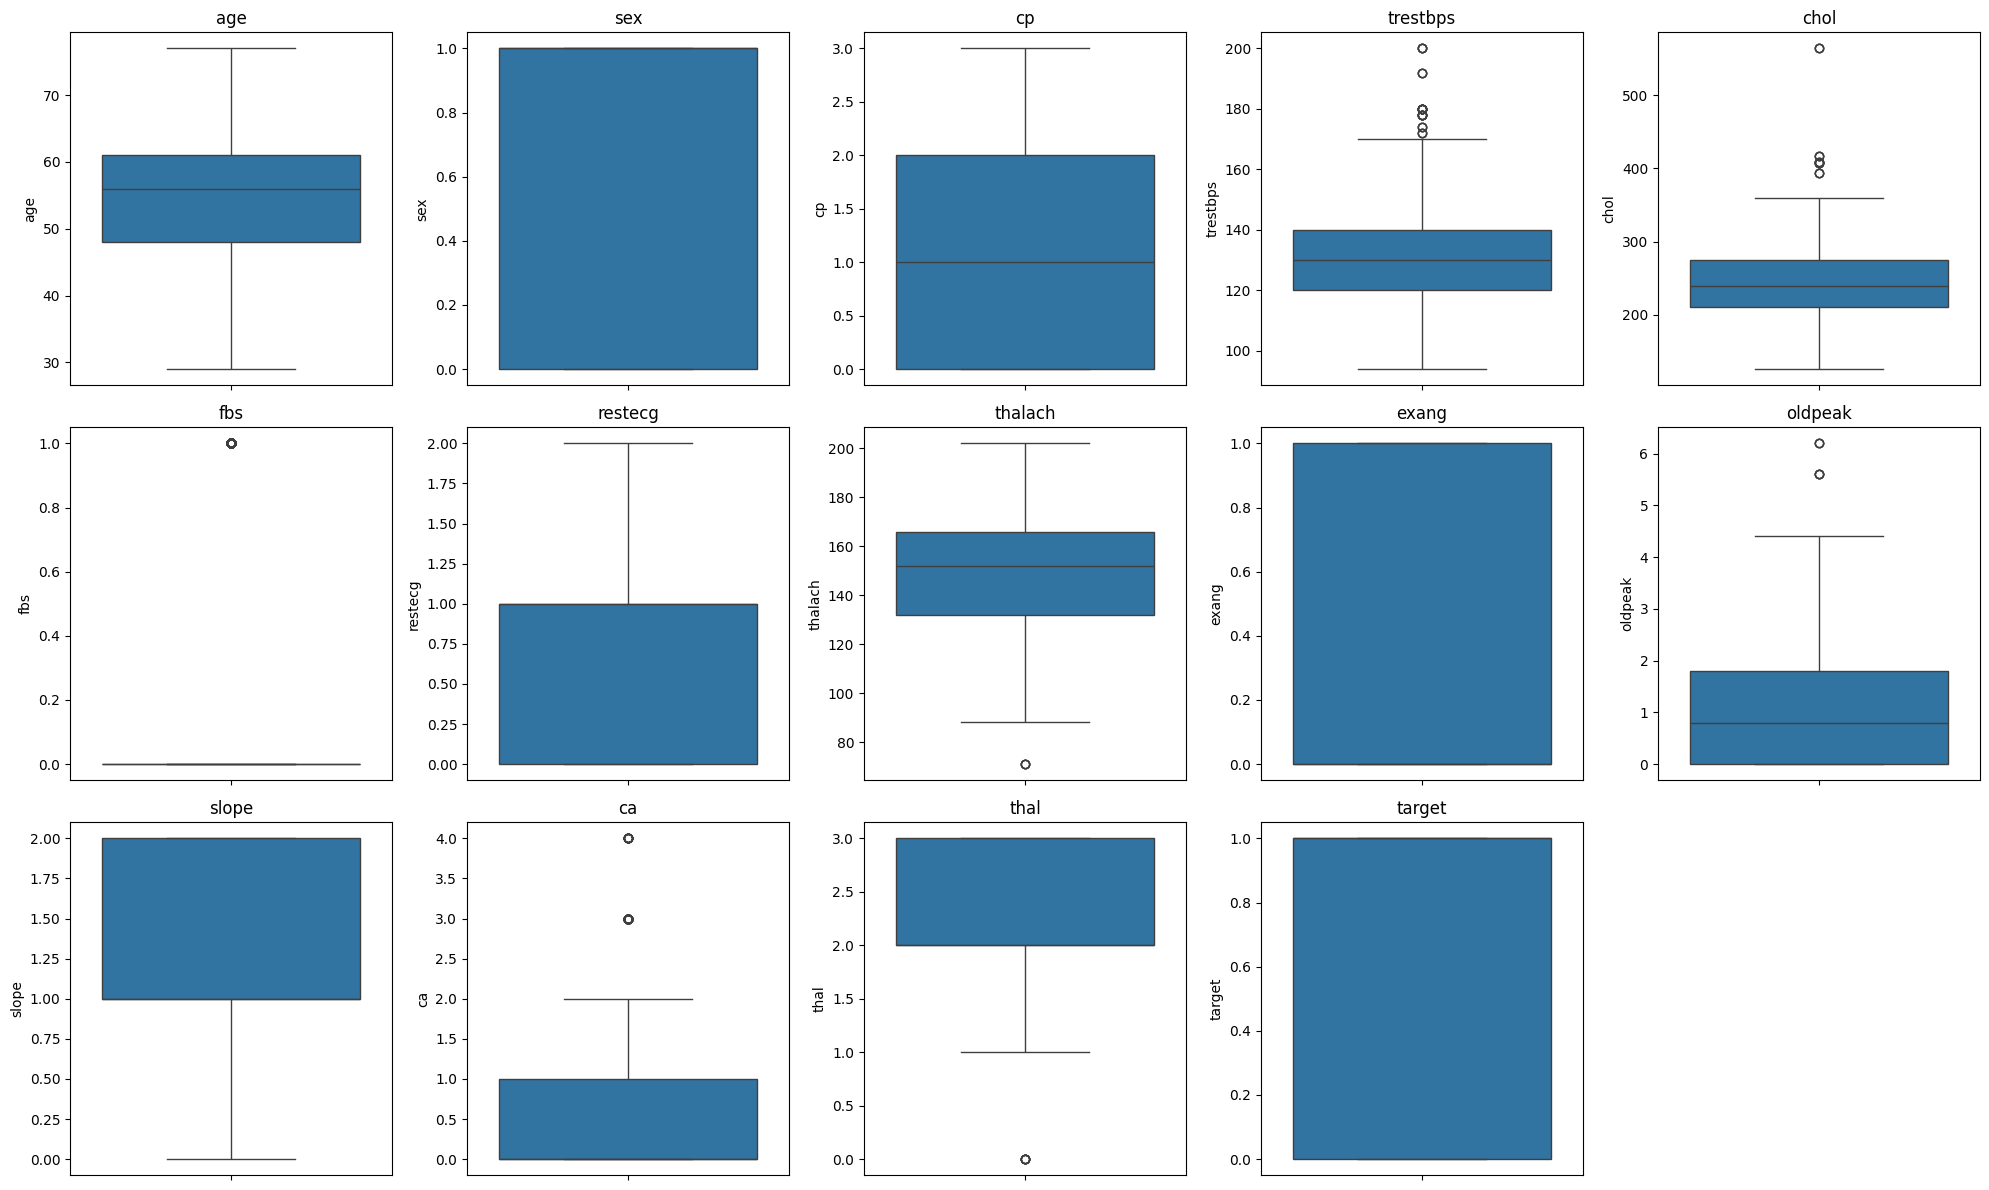

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memperoleh ringkasan statistik deskriptif
summary_statistics = df.describe()
print(summary_statistics)

# Menghitung ukuran grid subplot
num_cols = len(df.columns)
num_rows = (num_cols - 1) // 5 + 1  # Mencari jumlah baris yang diperlukan untuk menampung semua subplot

# Visualisasi distribusi untuk setiap variabel
plt.figure(figsize=(20, 12))  # Menyesuaikan ukuran keseluruhan gambar
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 5, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Visualisasi boxplot untuk setiap variabel
plt.figure(figsize=(20, 12))  # Menyesuaikan ukuran keseluruhan gambar
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 5, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


a. kolom age berdistribusi simetris (unimodal, normal), karena kurva frekuensi atau histogramnya memiliki bentuk yang simetris di sekitas titik pusatnya, puncak kurva berada di tengah dan distribusi di kedua sisi titik pusat sama.

b. kolom trestbps berdistribusi skew right (negative skew), karena distribusi di mana ekor distribusi merentang ke arah kanan dan nilai-nilai cenderung terkonsentrasi di sebelah kiri , hal ini berarti ada lebih banyak outlier di sisi kanan distribusi.

c. kolom chol  berdistribusi skew right (negative skew), karena distribusi di mana ekor distribusi merentang ke arah kanan dan nilai-nilai cenderung terkonsentrasi di sebelah kiri , hal ini berarti ada lebih banyak outlier di sisi kanan distribusi.

d. kolom thalach berdistribusi skew left (positive skew), karena distribusi di mana ekor distribusi merentang ke arah kiri dan nilai-nilai cenderung berkonsentrasi di sebelah kanan, hal ini berarti ada lebih banyak outlier di sisi kiri distribusi.

e. kolom oldpeak berdistribusi skew right (negative skew), karena distribusi di mana ekor distribusi merentang ke arah kanan dan nilai-nilai cenderung terkonsentrasi di sebelah kiri , hal ini berarti ada lebih banyak outlier di sisi kanan distribusi.

untuk kolom age, trestbps, chol, thalach, oldpeak merupakan numerik kontinu.

sedangkan untuk kolom sex, cp, fbs, restecg, exang, slope, ca, thal, dan target lebih cocok menggunakan barplot karena datanya bersifat numerik diskrit.

##2.1 Bivariate Analysis

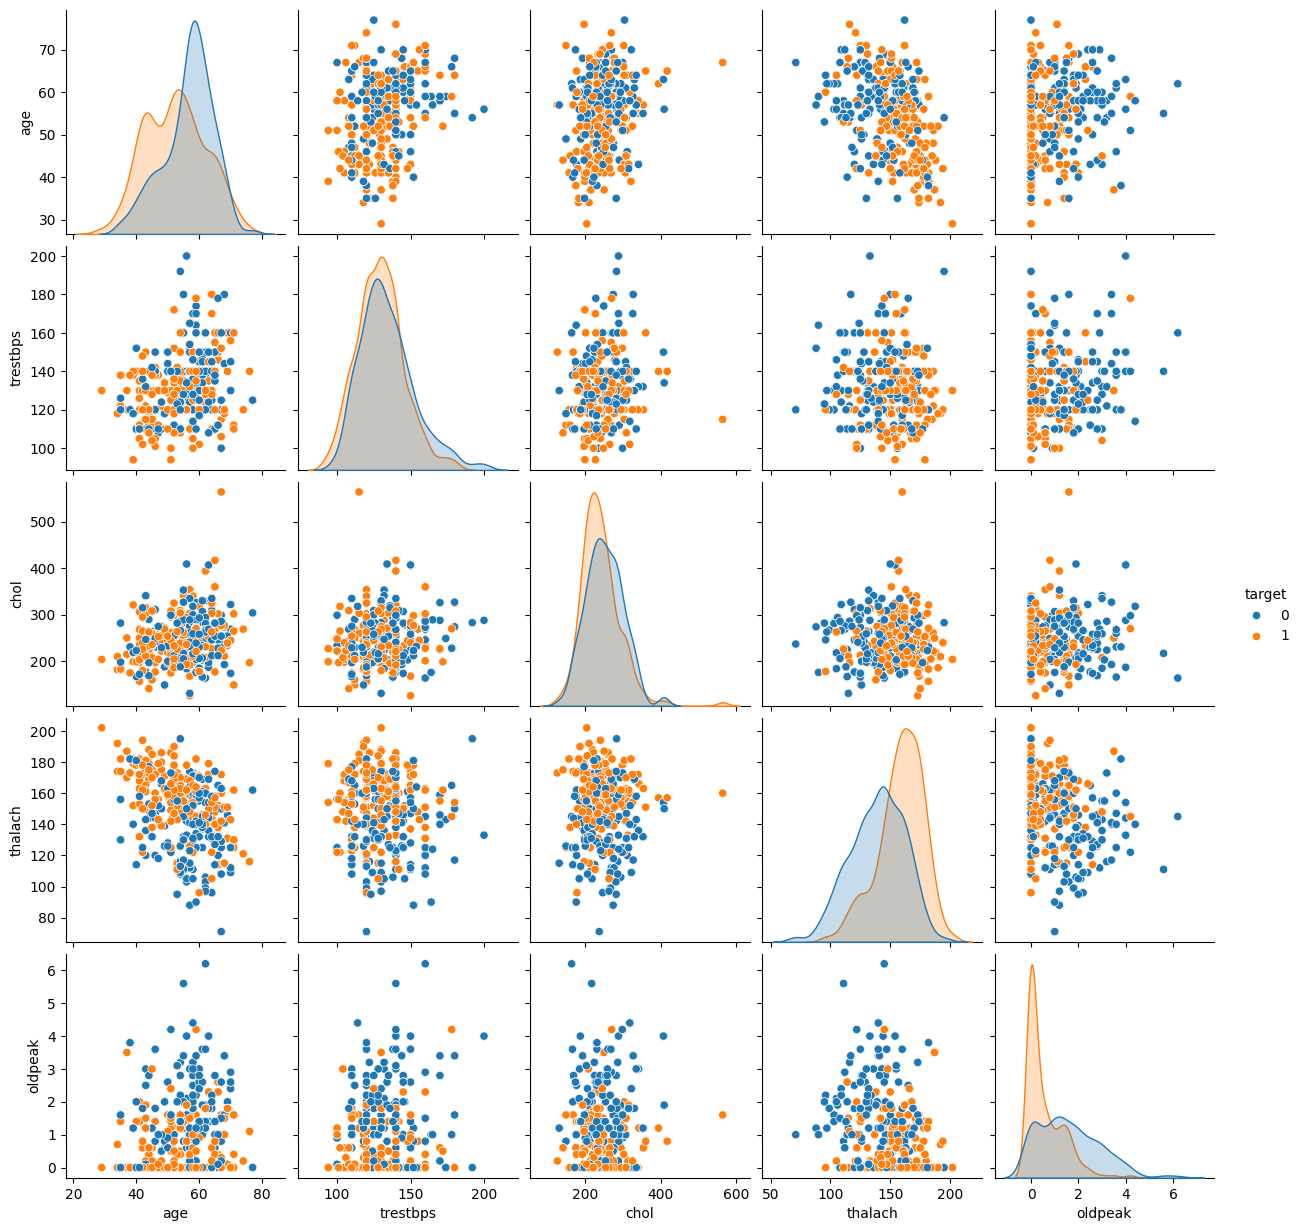

In [ ]:
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak', 'target']], hue = 'target')

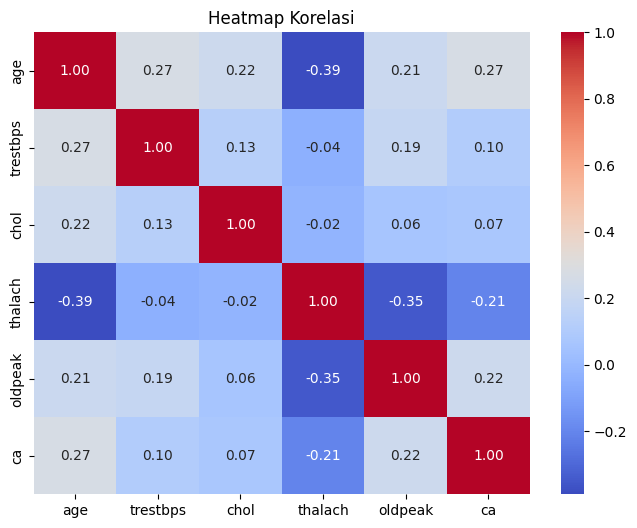

In [ ]:
# Menentukan kolom-kolom yang akan digunakan untuk heatmap
kolom_heatmap = ['age','trestbps','chol','thalach','oldpeak', 'ca']

# Menghitung matriks korelasi
corr_matrix = df[kolom_heatmap].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

### Penjelasan :
Berdasarkan heatmap, kita dapat melihat bahwa trestbps dan age memiliki korelasi yang tinggi. Dapat diasumsikan bahwa terdapat korelasi positif yang lemah antara usia (age) dan tekanan darah saat istirahat (trestbps). Korelasi ini berarti bahwa seiring bertambahnya usia, tekanan darah saat istirahat cenderung meningkat.

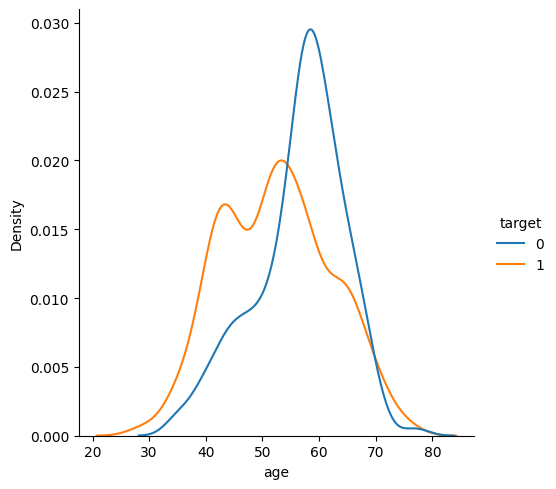

In [ ]:
import seaborn as sns
sns.displot(df, x="age", hue="target", kind="kde")

menampilkan distribusi kepadatan kernel (kernel density estimation) dari variabel "age", dengan membaginya berdasarkan nilai kolom "target" (hasil diagnosis). Ini dapat memberikan pemahaman yang baik tentang bagaimana distribusi usia berbeda antara kelompok yang memiliki hasil diagnosis positif dan negatif.
Eksplanasi sumbu x (horizontal): Merupakan nilai usia (age).
Eksplanasi sumbu y (vertikal): Menunjukkan kepadatan distribusi (density).
Garis-garis warna berbeda (berdasarkan hue="target"): Menunjukkan distribusi kepadatan usia untuk masing-masing nilai target. warna biru mewakili distribusi usia untuk hasil diagnosis negatif (sehat), sementara warna orange mewakili distribusi usia untuk hasil diagnosis positif (sakit).

#3. Feature Engineering

###3.1 Menghitung Rasio Kolestrol terhadap Tekanan Darah
Rasio kolesterol terhadap tekanan darah dapat memberikan informasi lebih kaya dibandingkan kedua variabel individual. Rasio ini dapat membantu memprediksi risiko penyakit jantung dengan lebih akurat. Pasien dengan rasio kolesterol terhadap tekanan darah tinggi menunjukkan risiko penyakit jantung yang lebih besar. Fitur ini membantu dokter mengidentifikasi pasien yang membutuhkan pemantauan dan intervensi lebih intensif.

In [ ]:
import numpy as np
import pandas as pd

# Hitung rasio kolesterol terhadap tekanan darah
def Cholesterol_to_BP_Ratio(chol, trestbps):
    return chol / trestbps

# Calculate the ratio
df["Cholesterol_to_BP_Ratio"] = df.apply(lambda row: Cholesterol_to_BP_Ratio(row["chol"], row["trestbps"]), axis=1)

df


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  Cholesterol_to_BP_Ratio  
0         2   2     3       0                 1.696000  
1         0   0     3       0                 1.450000  
2         0   0     3       0                 1.200000  
3         2   1     3       0                 1.371622  
4         1   3     2       0                 2.130435  
...     ...  ..   ...     ...                      ...  
1020      2   0     2       1                 1.578571  
1021      1   1     3       0                 2.064000  
1022      1   1     2       0                 2.500000  
1023      2   0     2       1                 2.309091  
1024      1   1     3       0                 1.566667  

[1025 rows x 15 columns]

###3.2 Kategori Generasi Berdasarkan Umur
Risiko penyakit jantung diketahui meningkat seiring bertambahnya usia. Dengan mengelompokkan data berdasarkan usia, kita dapat melihat bagaimana risiko penyakit jantung berbeda-beda di antara kelompok usia. Informasi mengenai risiko dan faktor risiko penyakit jantung pada kelompok usia tertentu dapat digunakan untuk mengembangkan intervensi yang tepat sasaran. Contohnya, program edukasi tentang gaya hidup sehat dapat ditargetkan pada kelompok usia yang memiliki risiko tinggi terkena penyakit jantung.

In [ ]:
import pandas as pd

# Buat kolom baru untuk generasi berdasarkan umur
generations = {
    "Gen Z": (0, 23),
    "Milenial": (24, 39),
    "Generasi X": (40, 55),
    "Baby Boomer": (56, 74),
    "Generasi Diam": (75, 120)
}

for generation, age_range in generations.items():
    df.loc[df["age"].between(age_range[0], age_range[1]), "Generation"] = generation

df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  Cholesterol_to_BP_Ratio   Generation  
0         2   2     3       0                 1.696000   Generasi X  
1         0   0     3       0                 1.450000   Generasi X  
2         0   0     3       0                 1.200000  Baby Boomer  
3         2   1     3       0                 1.371622  Baby Boomer  
4         1   3     2       0                 2.130435  Baby Boomer  
...     ...  ..   ...     ...                      ...          ...  
1020      2   0     2       1                 1.578571  Baby Boomer  
1021      1   1     3       0                 2.064000  Baby Boomer  
1022      1   1     2       0                 2.500000   Generasi X  
1023      2   0     2       1                 2.309091   Generasi X  
1024      1   1     3       0                 1.566667   Generasi X  

[1025 rows x 16 columns]

###3.3 Klasifikasi Tekanan Darah
Tekanan darah tinggi merupakan salah satu faktor risiko utama penyakit jantung. Dengan mengelompokkan data berdasarkan kategori tekanan darah, kita dapat melihat bagaimana risiko penyakit jantung berbeda-beda di antara kelompok tekanan darah. Informasi ini dapat membantu pembuat kebijakan dan profesional kesehatan untuk mengembangkan strategi pencegahan dan pengobatan yang lebih efektif.

In [ ]:
import pandas as pd

# Klasifikasi tekanan darah
def bp_category(bp):
    if bp < 90:
        return "Hipotensi"
    elif bp < 120:
        return "Normal"
    else:
        return "Hipertensi"

# Menambahkan kolom kategori tekanan darah ke dalam DataFrame
df = df.assign(BP_Category=df['trestbps'].apply(bp_category))

df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  Cholesterol_to_BP_Ratio   Generation  \
0         2   2     3       0                 1.696000   Generasi X   
1         0   0     3       0                 1.450000   Generasi X   
2         0   0     3       0                 1.200000  Baby Boomer   
3         2   1     3       0                 1.371622  Baby Boomer   
4         1   3     2       0                 2.130435  Baby Boomer   
...     ...  ..   ...     ...                      ...          ...   
1020      2   0     2       1                 1.578571  Baby Boomer   
1021      1   1     3       0                 2.064000  Baby Boomer   
1022      1   1     2       0                 2.500000   Generasi X   
1023      2   0     2       1                 2.309091   Generasi X   
1024      1   1     3       0                 1.566667   Generasi X   

     BP_Category  
0     Hipertensi  
1     Hipertensi  
2     Hipertensi  
3     Hipertensi  
4     Hipertensi  
...          ...  
1020  Hipertensi  
1021  Hipertensi  
1022      Normal  
1023      Normal  
1024  Hipertensi  

[1025 rows x 17 columns]

###3.4 Kategori Kolestrol
Kolesterol tinggi merupakan salah satu faktor risiko utama penyakit jantung. Dengan mengelompokkan data berdasarkan kategori kolesterol, kita dapat melihat bagaimana risiko penyakit jantung berbeda-beda di antara kelompok kolesterol. Fitur "Kategori Kolesterol" memungkinkan kita untuk memonitor tren penyakit jantung di antara kelompok kolesterol yang berbeda. Informasi ini dapat membantu pembuat kebijakan dan profesional kesehatan untuk mengembangkan strategi pencegahan dan pengobatan yang lebih efektif.

In [ ]:
import pandas as pd

# Asumsikan kolom chol LDL adalah "serum cholestoral in mg/dl"
# Referensi : https://www.nhlbi.nih.gov/health-topics/management-blood-cholesterol-in-adults
def cholestrol_category(chol):
  if chol < 200:
    return "Normal"
  elif 200 <= chol <= 239:
    return "Near Normal / Borderline High"
  elif chol >= 240:
    return "High"
  else:
    return "Very High"

df["Cholestrol Category"] = df["chol"].apply(cholestrol_category)

df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  Cholesterol_to_BP_Ratio   Generation  \
0         2   2     3       0                 1.696000   Generasi X   
1         0   0     3       0                 1.450000   Generasi X   
2         0   0     3       0                 1.200000  Baby Boomer   
3         2   1     3       0                 1.371622  Baby Boomer   
4         1   3     2       0                 2.130435  Baby Boomer   
...     ...  ..   ...     ...                      ...          ...   
1020      2   0     2       1                 1.578571  Baby Boomer   
1021      1   1     3       0                 2.064000  Baby Boomer   
1022      1   1     2       0                 2.500000   Generasi X   
1023      2   0     2       1                 2.309091   Generasi X   
1024      1   1     3       0                 1.566667   Generasi X   

     BP_Category            Cholestrol Category  
0     Hipertensi  Near Normal / Borderline High  
1     Hipertensi  Near Normal / Borderline High  
2     Hipertensi                         Normal  
3     Hipertensi  Near Normal / Borderline High  
4     Hipertensi                           High  
...          ...                            ...  
1020  Hipertensi  Near Normal / Borderline High  
1021  Hipertensi                           High  
1022      Normal                           High  
1023      Normal                           High  
1024  Hipertensi                         Normal  

[1025 rows x 18 columns]

###3.5 Tingkat Keparahan Penyakit Jantung
Tingkat keparahan penyakit jantung membantu memprediksi risiko kematian dan komplikasi, seperti gagal jantung dan stroke. Dokter dapat menggunakan informasi ini untuk menentukan pilihan pengobatan dan strategi skrining yang tepat bagi pasien. Fitur ini membantu mengelompokkan pasien berdasarkan tingkat keparahan penyakit, memungkinkan intervensi yang lebih terarah dan efisien.

In [ ]:
import pandas as pd

def severity_level(vessels, thal):
  if vessels == 0:
    return "Normal"
  elif vessels == 1:
    if thal == 3:
      return "Mild"
    else:
      return "Moderate"
  elif vessels >= 2:
    return "Severe"

# Tambahkan kolom tingkat keparahan
df["Severity_Level"] = df.apply(lambda x: severity_level(x["ca"], x["thal"]), axis=1)

df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  Cholesterol_to_BP_Ratio   Generation  \
0         2   2     3       0                 1.696000   Generasi X   
1         0   0     3       0                 1.450000   Generasi X   
2         0   0     3       0                 1.200000  Baby Boomer   
3         2   1     3       0                 1.371622  Baby Boomer   
4         1   3     2       0                 2.130435  Baby Boomer   
...     ...  ..   ...     ...                      ...          ...   
1020      2   0     2       1                 1.578571  Baby Boomer   
1021      1   1     3       0                 2.064000  Baby Boomer   
1022      1   1     2       0                 2.500000   Generasi X   
1023      2   0     2       1                 2.309091   Generasi X   
1024      1   1     3       0                 1.566667   Generasi X   

     BP_Category            Cholestrol Category Severity_Level  
0     Hipertensi  Near Normal / Borderline High         Severe  
1     Hipertensi  Near Normal / Borderline High         Normal  
2     Hipertensi                         Normal         Normal  
3     Hipertensi  Near Normal / Borderline High           Mild  
4     Hipertensi                           High         Severe  
...          ...                            ...            ...  
1020  Hipertensi  Near Normal / Borderline High         Normal  
1021  Hipertensi                           High           Mild  
1022      Normal                           High       Moderate  
1023      Normal                           High         Normal  
1024  Hipertensi                         Normal           Mild  

[1025 rows x 19 columns]

###3.6 Skor Risiko Penyakit Jantung
Skor risiko memberikan perkiraan kemungkinan individu terkena penyakit jantung dalam jangka waktu tertentu. Skor risiko dapat dipantau dari waktu ke waktu untuk menilai efektivitas intervensi dan memprediksi perubahan risiko pasien.

In [ ]:
# Fungsi untuk menghitung skor risiko terkena penyakit jantung
def hitung_skor_risiko(row):
    skor = 0

    # Menambahkan skor berdasarkan jenis nyeri dada
    if row['cp'] == 1:
        skor += 2
    elif row['cp'] == 2:
        skor += 1

    # Menambahkan skor berdasarkan hasil tes EKG
    if row['restecg'] == 1:
        skor += 1
    elif row['restecg'] == 2:
        skor += 2

    # Menambahkan skor berdasarkan jumlah pembuluh darah utama yang tertutup
    skor += row['cp']

    return skor

# Menambahkan kolom skor risiko terkena penyakit jantung ke DataFrame
df['skor_risiko_penyakit_jantung'] = df.apply(hitung_skor_risiko, axis=1)

df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  Cholesterol_to_BP_Ratio   Generation  \
0         2   2     3       0                 1.696000   Generasi X   
1         0   0     3       0                 1.450000   Generasi X   
2         0   0     3       0                 1.200000  Baby Boomer   
3         2   1     3       0                 1.371622  Baby Boomer   
4         1   3     2       0                 2.130435  Baby Boomer   
...     ...  ..   ...     ...                      ...          ...   
1020      2   0     2       1                 1.578571  Baby Boomer   
1021      1   1     3       0                 2.064000  Baby Boomer   
1022      1   1     2       0                 2.500000   Generasi X   
1023      2   0     2       1                 2.309091   Generasi X   
1024      1   1     3       0                 1.566667   Generasi X   

     BP_Category            Cholestrol Category Severity_Level  \
0     Hipertensi  Near Normal / Borderline High         Severe   
1     Hipertensi  Near Normal / Borderline High         Normal   
2     Hipertensi                         Normal         Normal   
3     Hipertensi  Near Normal / Borderline High           Mild   
4     Hipertensi                           High         Severe   
...          ...                            ...            ...   
1020  Hipertensi  Near Normal / Borderline High         Normal   
1021  Hipertensi                           High           Mild   
1022      Normal                           High       Moderate   
1023      Normal                           High         Normal   
1024  Hipertensi                         Normal           Mild   

      skor_risiko_penyakit_jantung  
0                                1  
1                                0  
2                                1  
3                                1  
4                                1  
...                            ...  
1020                             4  
1021                             0  
1022                             0  
1023                             0  
1024                             1  

[1025 rows x 20 columns]

### 3.7 Interaksi anatara Usia dan Trestbps
Interaksi usia dan trestbps dapat menunjukkan bagaimana pengaruh usia terhadap risiko penyakit jantung berubah pada tingkat trestbps yang berbeda. Fitur ini membantu untuk melihat apakah efek usia pada risiko penyakit jantung diperkuat atau dilemahkan oleh trestbps. Fitur interaksi usia dan trestbps dapat membantu untuk memahami bagaimana kedua faktor ini saling terkait dalam mempengaruhi risiko penyakit jantung.
Hal ini dapat memberikan informasi yang berharga untuk mengembangkan strategi pencegahan dan pengobatan penyakit jantung yang lebih efektif.

In [ ]:
import pandas as pd

# Membuat kolom baru dengan menggunakan metode apply
df['Interaksi_Usia_Trestbps'] = df.apply(lambda row: row['age'] * row['trestbps'], axis=1)

# Menampilkan dataframe
df


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  ca  thal  target  Cholesterol_to_BP_Ratio   Generation BP_Category  \
0     ...   2     3       0                 1.696000   Generasi X  Hipertensi   
1     ...   0     3       0                 1.450000   Generasi X  Hipertensi   
2     ...   0     3       0                 1.200000  Baby Boomer  Hipertensi   
3     ...   1     3       0                 1.371622  Baby Boomer  Hipertensi   
4     ...   3     2       0                 2.130435  Baby Boomer  Hipertensi   
...   ...  ..   ...     ...                      ...          ...         ...   
1020  ...   0     2       1                 1.578571  Baby Boomer  Hipertensi   
1021  ...   1     3       0                 2.064000  Baby Boomer  Hipertensi   
1022  ...   1     2       0                 2.500000   Generasi X      Normal   
1023  ...   0     2       1                 2.309091   Generasi X      Normal   
1024  ...   1     3       0                 1.566667   Generasi X  Hipertensi   

                Cholestrol Category Severity_Level  \
0     Near Normal / Borderline High         Severe   
1     Near Normal / Borderline High         Normal   
2                            Normal         Normal   
3     Near Normal / Borderline High           Mild   
4                              High         Severe   
...                             ...            ...   
1020  Near Normal / Borderline High         Normal   
1021                           High           Mild   
1022                           High       Moderate   
1023                           High         Normal   
1024                         Normal           Mild   

     skor_risiko_penyakit_jantung  Interaksi_Usia_Trestbps  
0                               1                     6500  
1                               0                     7420  
2                               1                    10150  
3                               1                     9028  
4                               1                     8556  
...                           ...                      ...  
1020                            4                     8260  
1021                            0                     7500  
1022                            0                     5170  
1023                            0                     5500  
1024                            1                     6480  

[1025 rows x 21 columns]

## 3.8 Interpretasi Hasil ECG menjadi kategori
Hasil ECG yang abnormal dapat mengindikasikan adanya masalah pada jantung, seperti aritmia, iskemia, atau infark miokard. Dengan mengelompokkan data berdasarkan interpretasi hasil EKG, kita dapat melihat bagaimana risiko penyakit jantung berbeda-beda di antara kelompok tersebut.

In [ ]:
import pandas as pd

# Membuat fungsi untuk menginterpretasikan hasil ECG
def interpret_ecg(restecg):
    if restecg == 0:
        return 'normal'
    elif restecg == 1:
        return 'abnormal'
    elif restecg == 2:
        return 'hypertrophy'
    else:
        return 'unknown'  # Jika ada nilai yang tidak dikenali, bisa diganti dengan label 'unknown'

# Menerapkan fungsi ke kolom Restecg untuk membuat kolom baru 'ECG Result'
df['ECG Result'] = df['restecg'].apply(interpret_ecg)

df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  thal  target  Cholesterol_to_BP_Ratio   Generation  BP_Category  \
0     ...     3       0                 1.696000   Generasi X   Hipertensi   
1     ...     3       0                 1.450000   Generasi X   Hipertensi   
2     ...     3       0                 1.200000  Baby Boomer   Hipertensi   
3     ...     3       0                 1.371622  Baby Boomer   Hipertensi   
4     ...     2       0                 2.130435  Baby Boomer   Hipertensi   
...   ...   ...     ...                      ...          ...          ...   
1020  ...     2       1                 1.578571  Baby Boomer   Hipertensi   
1021  ...     3       0                 2.064000  Baby Boomer   Hipertensi   
1022  ...     2       0                 2.500000   Generasi X       Normal   
1023  ...     2       1                 2.309091   Generasi X       Normal   
1024  ...     3       0                 1.566667   Generasi X   Hipertensi   

                Cholestrol Category Severity_Level  \
0     Near Normal / Borderline High         Severe   
1     Near Normal / Borderline High         Normal   
2                            Normal         Normal   
3     Near Normal / Borderline High           Mild   
4                              High         Severe   
...                             ...            ...   
1020  Near Normal / Borderline High         Normal   
1021                           High           Mild   
1022                           High       Moderate   
1023                           High         Normal   
1024                         Normal           Mild   

     skor_risiko_penyakit_jantung Interaksi_Usia_Trestbps  ECG Result  
0                               1                    6500    abnormal  
1                               0                    7420      normal  
2                               1                   10150    abnormal  
3                               1                    9028    abnormal  
4                               1                    8556    abnormal  
...                           ...                     ...         ...  
1020                            4                    8260    abnormal  
1021                            0                    7500      normal  
1022                            0                    5170      normal  
1023                            0                    5500      normal  
1024                            1                    6480    abnormal  

[1025 rows x 22 columns]

## 3.9 ST Segment Depression
depresi segmen ST pada ECG adalah salah satu tanda utama iskemia miokard. Fitur "ST Segment Depression" dapat membantu dalam mengidentifikasi pasien yang berisiko mengalami iskemia miokard. Informasi mengenai depresi segmen ST dapat membantu dokter dalam mengambil keputusan klinis, seperti apakah pasien perlu dirawat di rumah sakit atau menjalani tes diagnostik lebih lanjut.

In [ ]:
import pandas as pd

# Membuat fungsi untuk menganalisis segmen ST dan menentukan apakah ada depresi segmen ST atau tidak
def st_segment_depression(oldpeak, threshold=1.0):
    if oldpeak > threshold:
        return 'YES'
    else:
        return 'NO'

# Menentukan ambang batas untuk depresi segmen ST (misalnya, 1.0)
threshold = 1.0

# Menerapkan fungsi ke kolom Oldpeak untuk membuat kolom baru 'ST Segment Depression'
df['ST Segment Depression'] = df['oldpeak'].apply(st_segment_depression, threshold=threshold)

df


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  target  Cholesterol_to_BP_Ratio   Generation  BP_Category  \
0     ...       0                 1.696000   Generasi X   Hipertensi   
1     ...       0                 1.450000   Generasi X   Hipertensi   
2     ...       0                 1.200000  Baby Boomer   Hipertensi   
3     ...       0                 1.371622  Baby Boomer   Hipertensi   
4     ...       0                 2.130435  Baby Boomer   Hipertensi   
...   ...     ...                      ...          ...          ...   
1020  ...       1                 1.578571  Baby Boomer   Hipertensi   
1021  ...       0                 2.064000  Baby Boomer   Hipertensi   
1022  ...       0                 2.500000   Generasi X       Normal   
1023  ...       1                 2.309091   Generasi X       Normal   
1024  ...       0                 1.566667   Generasi X   Hipertensi   

                Cholestrol Category Severity_Level  \
0     Near Normal / Borderline High         Severe   
1     Near Normal / Borderline High         Normal   
2                            Normal         Normal   
3     Near Normal / Borderline High           Mild   
4                              High         Severe   
...                             ...            ...   
1020  Near Normal / Borderline High         Normal   
1021                           High           Mild   
1022                           High       Moderate   
1023                           High         Normal   
1024                         Normal           Mild   

     skor_risiko_penyakit_jantung Interaksi_Usia_Trestbps ECG Result  \
0                               1                    6500   abnormal   
1                               0                    7420     normal   
2                               1                   10150   abnormal   
3                               1                    9028   abnormal   
4                               1                    8556   abnormal   
...                           ...                     ...        ...   
1020                            4                    8260   abnormal   
1021                            0                    7500     normal   
1022                            0                    5170     normal   
1023                            0                    5500     normal   
1024                            1                    6480   abnormal   

      ST Segment Depression  
0                        NO  
1                       YES  
2                       YES  
3                        NO  
4                       YES  
...                     ...  
1020                     NO  
1021                    YES  
1022                     NO  
1023                     NO  
1024                    YES  

[1025 rows x 23 columns]

# 3.10 Kontrol Gula Darah (Blood Sugar Control)
Fitur ini dapat membantu dokter dalam mendiagnosis diabetes dengan lebih akurat, terutama pada pasien dengan Fbs normal tetapi memiliki faktor risiko lain untuk diabetes.

In [ ]:
import pandas as pd

# Membuat fungsi untuk menilai kontrol gula darah
def evaluate_blood_sugar_control(row):
    if row['fbs'] == 1:
        return 'Poor Control'
    else:
        return 'Good Control'

# Menambahkan kolom baru 'Blood Sugar Control' ke dalam dataset
df['Blood Sugar Control'] = df.apply(evaluate_blood_sugar_control, axis=1)

df


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  Cholesterol_to_BP_Ratio   Generation  BP_Category  \
0     ...                 1.696000   Generasi X   Hipertensi   
1     ...                 1.450000   Generasi X   Hipertensi   
2     ...                 1.200000  Baby Boomer   Hipertensi   
3     ...                 1.371622  Baby Boomer   Hipertensi   
4     ...                 2.130435  Baby Boomer   Hipertensi   
...   ...                      ...          ...          ...   
1020  ...                 1.578571  Baby Boomer   Hipertensi   
1021  ...                 2.064000  Baby Boomer   Hipertensi   
1022  ...                 2.500000   Generasi X       Normal   
1023  ...                 2.309091   Generasi X       Normal   
1024  ...                 1.566667   Generasi X   Hipertensi   

                Cholestrol Category  Severity_Level  \
0     Near Normal / Borderline High          Severe   
1     Near Normal / Borderline High          Normal   
2                            Normal          Normal   
3     Near Normal / Borderline High            Mild   
4                              High          Severe   
...                             ...             ...   
1020  Near Normal / Borderline High          Normal   
1021                           High            Mild   
1022                           High        Moderate   
1023                           High          Normal   
1024                         Normal            Mild   

     skor_risiko_penyakit_jantung Interaksi_Usia_Trestbps ECG Result  \
0                               1                    6500   abnormal   
1                               0                    7420     normal   
2                               1                   10150   abnormal   
3                               1                    9028   abnormal   
4                               1                    8556   abnormal   
...                           ...                     ...        ...   
1020                            4                    8260   abnormal   
1021                            0                    7500     normal   
1022                            0                    5170     normal   
1023                            0                    5500     normal   
1024                            1                    6480   abnormal   

     ST Segment Depression  Blood Sugar Control  
0                       NO         Good Control  
1                      YES         Poor Control  
2                      YES         Good Control  
3                       NO         Good Control  
4                      YES         Poor Control  
...                    ...                  ...  
1020                    NO         Good Control  
1021                   YES         Good Control  
1022                    NO         Good Control  
1023                    NO         Good Control  
1024                   YES         Good Control  

[1025 rows x 24 columns]

## 3.11 Indikator Respons Jantung
Respon jantung dapat membantu dalam memprediksi keparahan penyakit jantung. Informasi mengenai respon jantung dapat membantu dokter dalam mengambil keputusan klinis, seperti apakah pasien perlu dirawat di rumah sakit atau menjalani tes diagnostik lebih lanjut.

In [ ]:
# Membuat indikator respons jantung
# Misalkan ingin memberikan skor respons jantung berdasarkan kombinasi nilai dari kolom-kolom Thalac, Exang, dan Oldpeak
def heart_response_indicator(row):
    if row['exang'] == 1:
        # Jika pasien mengalami latihan angina, berikan skor 0
        return 0
    else:
        # Jika pasien tidak mengalami latihan angina, hitung skor berdasarkan nilai Thalac dan Oldpeak
        if row['thalach'] >= 150:
            # Jika detak jantung maksimum mencapai atau melebihi 150, berikan skor 2
            return 2
        elif row['thalach'] >= 120 and row['oldpeak'] <= 1:
            # Jika detak jantung maksimum mencapai atau melebihi 120 dan Oldpeak kurang dari atau sama dengan 1, berikan skor 1
            return 1
        else:
            # Jika tidak memenuhi kondisi di atas, berikan skor 0
            return 0

# Menambahkan kolom baru "Heart_Response"
df['Heart_Response'] = df.apply(heart_response_indicator, axis=1)

df


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...   Generation  BP_Category            Cholestrol Category  \
0     ...   Generasi X   Hipertensi  Near Normal / Borderline High   
1     ...   Generasi X   Hipertensi  Near Normal / Borderline High   
2     ...  Baby Boomer   Hipertensi                         Normal   
3     ...  Baby Boomer   Hipertensi  Near Normal / Borderline High   
4     ...  Baby Boomer   Hipertensi                           High   
...   ...          ...          ...                            ...   
1020  ...  Baby Boomer   Hipertensi  Near Normal / Borderline High   
1021  ...  Baby Boomer   Hipertensi                           High   
1022  ...   Generasi X       Normal                           High   
1023  ...   Generasi X       Normal                           High   
1024  ...   Generasi X   Hipertensi                         Normal   

      Severity_Level  skor_risiko_penyakit_jantung Interaksi_Usia_Trestbps  \
0             Severe                             1                    6500   
1             Normal                             0                    7420   
2             Normal                             1                   10150   
3               Mild                             1                    9028   
4             Severe                             1                    8556   
...              ...                           ...                     ...   
1020          Normal                             4                    8260   
1021            Mild                             0                    7500   
1022        Moderate                             0                    5170   
1023          Normal                             0                    5500   
1024            Mild                             1                    6480   

     ECG Result ST Segment Depression Blood Sugar Control  Heart_Response  
0      abnormal                    NO        Good Control               2  
1        normal                   YES        Poor Control               0  
2      abnormal                   YES        Good Control               0  
3      abnormal                    NO        Good Control               2  
4      abnormal                   YES        Poor Control               0  
...         ...                   ...                 ...             ...  
1020   abnormal                    NO        Good Control               0  
1021     normal                   YES        Good Control               0  
1022     normal                    NO        Good Control               0  
1023     normal                    NO        Good Control               2  
1024   abnormal                   YES        Good Control               0  

[1025 rows x 25 columns]

## 3.12 Status Jantung Gabungan
Dengan ditambahkannya fitur "Combined_Heart_Status", diharapkan data tersebut menjadi lebih informatif dan memudahkan analisis untuk  diagnosis penyakit jantung.  Dokter atau peneliti dapat menggunakan fitur ini untuk lebih mudah mengelompokkan pasien berdasarkan tingkat keparahan penyakit jantung.

In [ ]:
# Membuat fungsi untuk menentukan status jantung gabungan
def combined_heart_status(row):
    if row['thal'] == 3 and row['ca'] == 0:
        return 'Normal'
    elif row['thal'] == 6:
        return 'Fixed Defect'
    elif row['thal'] == 7:
        return 'Reversible Defect'
    else:
        return 'Other'

# Menambahkan kolom baru "Combined_Heart_Status"
df['Combined_Heart_Status'] = df.apply(combined_heart_status, axis=1)

df


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  BP_Category            Cholestrol Category  Severity_Level  \
0     ...   Hipertensi  Near Normal / Borderline High          Severe   
1     ...   Hipertensi  Near Normal / Borderline High          Normal   
2     ...   Hipertensi                         Normal          Normal   
3     ...   Hipertensi  Near Normal / Borderline High            Mild   
4     ...   Hipertensi                           High          Severe   
...   ...          ...                            ...             ...   
1020  ...   Hipertensi  Near Normal / Borderline High          Normal   
1021  ...   Hipertensi                           High            Mild   
1022  ...       Normal                           High        Moderate   
1023  ...       Normal                           High          Normal   
1024  ...   Hipertensi                         Normal            Mild   

      skor_risiko_penyakit_jantung  Interaksi_Usia_Trestbps ECG Result  \
0                                1                     6500   abnormal   
1                                0                     7420     normal   
2                                1                    10150   abnormal   
3                                1                     9028   abnormal   
4                                1                     8556   abnormal   
...                            ...                      ...        ...   
1020                             4                     8260   abnormal   
1021                             0                     7500     normal   
1022                             0                     5170     normal   
1023                             0                     5500     normal   
1024                             1                     6480   abnormal   

     ST Segment Depression Blood Sugar Control Heart_Response  \
0                       NO        Good Control              2   
1                      YES        Poor Control              0   
2                      YES        Good Control              0   
3                       NO        Good Control              2   
4                      YES        Poor Control              0   
...                    ...                 ...            ...   
1020                    NO        Good Control              0   
1021                   YES        Good Control              0   
1022                    NO        Good Control              0   
1023                    NO        Good Control              2   
1024                   YES        Good Control              0   

      Combined_Heart_Status  
0                     Other  
1                    Normal  
2                    Normal  
3                     Other  
4                     Other  
...                     ...  
1020                  Other  
1021                  Other  
1022                  Other  
1023                  Other  
1024                  Other  

[1025 rows x 26 columns]

## 3.13 Menghitung Skor Risiko Kardiovaskular
Menggabungkan informasi dari beberapa faktor risiko (seperti usia, jenis kelamin, tekanan darah, dan kolesterol) dapat memberikan gambaran yang lebih komprehensif tentang risiko pasien terkena penyakit kardiovaskular.
Hal ini memungkinkan model prediksi untuk lebih akurat dalam mengidentifikasi pasien yang berisiko tinggi terkena penyakit kardiovaskular. Risiko kardiovaskular yang dihitung dapat memberikan informasi yang lebih mudah dipahami oleh dokter dan pasien.

In [ ]:
import pandas as pd

# Fungsi untuk menghitung skor risiko kardiovaskular
def calculate_cardiovascular_risk(row):
    age = row['age']
    sex = row['sex']
    trestbps = row['trestbps']
    chol = row['chol']

    # Inisialisasi skor
    risk_score = 0

    # Menambahkan skor berdasarkan usia
    if age < 45:
        risk_score += 0
    elif 45 <= age < 55:
        risk_score += 1
    elif 55 <= age < 65:
        risk_score += 2
    else:
        risk_score += 3

    # Menambahkan skor berdasarkan jenis kelamin
    risk_score += sex  # Jika laki-laki, tambahkan 1 poin

    # Menambahkan skor berdasarkan tekanan darah istirahat
    if trestbps < 120:
        risk_score += 0
    elif 120 <= trestbps < 140:
        risk_score += 1
    else:
        risk_score += 2

    # Menambahkan skor berdasarkan kolesterol serum
    if chol < 200:
        risk_score += 0
    elif 200 <= chol < 240:
        risk_score += 1
    else:
        risk_score += 2

    return risk_score

# Menggunakan fungsi apply untuk menghitung risiko kardiovaskular untuk setiap baris
df['risk_score'] = df.apply(calculate_cardiovascular_risk, axis=1)

# Menampilkan DataFrame dengan kolom risiko kardiovaskular
df


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...            Cholestrol Category  Severity_Level  \
0     ...  Near Normal / Borderline High          Severe   
1     ...  Near Normal / Borderline High          Normal   
2     ...                         Normal          Normal   
3     ...  Near Normal / Borderline High            Mild   
4     ...                           High          Severe   
...   ...                            ...             ...   
1020  ...  Near Normal / Borderline High          Normal   
1021  ...                           High            Mild   
1022  ...                           High        Moderate   
1023  ...                           High          Normal   
1024  ...                         Normal            Mild   

      skor_risiko_penyakit_jantung  Interaksi_Usia_Trestbps  ECG Result  \
0                                1                     6500    abnormal   
1                                0                     7420      normal   
2                                1                    10150    abnormal   
3                                1                     9028    abnormal   
4                                1                     8556    abnormal   
...                            ...                      ...         ...   
1020                             4                     8260    abnormal   
1021                             0                     7500      normal   
1022                             0                     5170      normal   
1023                             0                     5500      normal   
1024                             1                     6480    abnormal   

     ST Segment Depression Blood Sugar Control Heart_Response  \
0                       NO        Good Control              2   
1                      YES        Poor Control              0   
2                      YES        Good Control              0   
3                       NO        Good Control              2   
4                      YES        Poor Control              0   
...                    ...                 ...            ...   
1020                    NO        Good Control              0   
1021                   YES        Good Control              0   
1022                    NO        Good Control              0   
1023                    NO        Good Control              2   
1024                   YES        Good Control              0   

     Combined_Heart_Status  risk_score  
0                    Other           4  
1                   Normal           5  
2                   Normal           6  
3                    Other           6  
4                    Other           5  
...                    ...         ...  
1020                 Other           6  
1021                 Other           6  
1022                 Other           4  
1023                 Other           3  
1024                 Other           3  

[1025 rows x 27 columns]

# 3.14 Interaksi Gula Darah dan Angina yang Dipicu oleh Latihan
Pasien diabetes memiliki risiko lebih tinggi terkena angina yang dipicu oleh latihan. Fitur ini dapat membantu dokter dalam menentukan pengobatan yang tepat untuk pasien dengan diabetes dan angina yang dipicu oleh latihan.

In [ ]:
import pandas as pd

# Membuat fungsi untuk mengevaluasi interaksi antara gula darah puasa dan exercise induced angina
def evaluate_blood_sugar_exang_interaction(row):
    if row['fbs'] == 1 and row['exang'] == 1:
        return 'High Risk'
    elif row['fbs'] == 1 and row['exang'] == 0:
        return 'Moderate Risk'
    elif row['fbs'] == 0 and row['exang'] == 1:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

# Menambahkan kolom baru 'Blood Sugar & Exang Interaction' ke dalam dataset
df['Blood Sugar & Exang Interaction'] = df.apply(evaluate_blood_sugar_exang_interaction, axis=1)

# Menampilkan dataset yang telah diperbarui
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  Severity_Level  skor_risiko_penyakit_jantung  \
0     ...          Severe                             1   
1     ...          Normal                             0   
2     ...          Normal                             1   
3     ...            Mild                             1   
4     ...          Severe                             1   
...   ...             ...                           ...   
1020  ...          Normal                             4   
1021  ...            Mild                             0   
1022  ...        Moderate                             0   
1023  ...          Normal                             0   
1024  ...            Mild                             1   

      Interaksi_Usia_Trestbps  ECG Result  ST Segment Depression  \
0                        6500    abnormal                     NO   
1                        7420      normal                    YES   
2                       10150    abnormal                    YES   
3                        9028    abnormal                     NO   
4                        8556    abnormal                    YES   
...                       ...         ...                    ...   
1020                     8260    abnormal                     NO   
1021                     7500      normal                    YES   
1022                     5170      normal                     NO   
1023                     5500      normal                     NO   
1024                     6480    abnormal                    YES   

     Blood Sugar Control Heart_Response Combined_Heart_Status risk_score  \
0           Good Control              2                 Other          4   
1           Poor Control              0                Normal          5   
2           Good Control              0                Normal          6   
3           Good Control              2                 Other          6   
4           Poor Control              0                 Other          5   
...                  ...            ...                   ...        ...   
1020        Good Control              0                 Other          6   
1021        Good Control              0                 Other          6   
1022        Good Control              0                 Other          4   
1023        Good Control              2                 Other          3   
1024        Good Control              0                 Other          3   

      Blood Sugar & Exang Interaction  
0                            Low Risk  
1                           High Risk  
2                       Moderate Risk  
3                            Low Risk  
4                       Moderate Risk  
...                               ...  
1020                    Moderate Risk  
1021                    Moderate Risk  
1022                    Moderate Risk  
1023                         Low Risk  
1024                         Low Risk  

[1025 rows x 28 columns]

# 3.15 Tingkat Kebugaran
Pasien dikategorikan ke dalam beberapa tingkat kebugaran, seperti "tinggi", "sedang", dan "rendah". Pasien dengan tingkat kebugaran yang rendah memiliki risiko lebih tinggi terkena penyakit jantung. Fitur ini dapat membantu pasien dalam mengetahui tingkat kebugaran mereka dan memotivasi mereka untuk meningkatkan kebugaran.

In [ ]:
import pandas as pd

# Membuat fungsi untuk menilai tingkat kebugaran
def evaluate_fitness_level(row):
    if row['thalach'] >= 160 and row['exang'] == 0 and row['oldpeak'] <= 1:
        return 'Tinggi'
    elif (row['thalach'] >= 140 or (row['thalach'] >= 120 and row['exang'] == 0)) and row['oldpeak'] <= 2:
        return 'Sedang'
    else:
        return 'Rendah'

# Menambahkan kolom baru 'Fitness Level' ke dalam DataFrame
df['Fitness Level'] = df.apply(evaluate_fitness_level, axis=1)

df


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  skor_risiko_penyakit_jantung  Interaksi_Usia_Trestbps  ECG Result  \
0     ...                             1                     6500    abnormal   
1     ...                             0                     7420      normal   
2     ...                             1                    10150    abnormal   
3     ...                             1                     9028    abnormal   
4     ...                             1                     8556    abnormal   
...   ...                           ...                      ...         ...   
1020  ...                             4                     8260    abnormal   
1021  ...                             0                     7500      normal   
1022  ...                             0                     5170      normal   
1023  ...                             0                     5500      normal   
1024  ...                             1                     6480    abnormal   

      ST Segment Depression  Blood Sugar Control Heart_Response  \
0                        NO         Good Control              2   
1                       YES         Poor Control              0   
2                       YES         Good Control              0   
3                        NO         Good Control              2   
4                       YES         Poor Control              0   
...                     ...                  ...            ...   
1020                     NO         Good Control              0   
1021                    YES         Good Control              0   
1022                     NO         Good Control              0   
1023                     NO         Good Control              2   
1024                    YES         Good Control              0   

     Combined_Heart_Status risk_score Blood Sugar & Exang Interaction  \
0                    Other          4                        Low Risk   
1                   Normal          5                       High Risk   
2                   Normal          6                   Moderate Risk   
3                    Other          6                        Low Risk   
4                    Other          5                   Moderate Risk   
...                    ...        ...                             ...   
1020                 Other          6                   Moderate Risk   
1021                 Other          6                   Moderate Risk   
1022                 Other          4                   Moderate Risk   
1023                 Other          3                        Low Risk   
1024                 Other          3                        Low Risk   

      Fitness Level  
0            Tinggi  
1            Rendah  
2            Rendah  
3            Tinggi  
4            Rendah  
...             ...  
1020         Sedang  
1021         Rendah  
1022         Rendah  
1023         Sedang  
1024         Rendah  

[1025 rows x 29 columns]

In [ ]:
df.shape

(1025, 29)

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   52    1   0       125   212    0        1      168      0      1.0  ...   
1   53    1   0       140   203    1        0      155      1      3.1  ...   
2   70    1   0       145   174    0        1      125      1      2.6  ...   
3   61    1   0       148   203    0        1      161      0      0.0  ...   
4   62    0   0       138   294    1        1      106      0      1.9  ...   

   skor_risiko_penyakit_jantung  Interaksi_Usia_Trestbps  ECG Result  \
0                             1                     6500    abnormal   
1                             0                     7420      normal   
2                             1                    10150    abnormal   
3                             1                     9028    abnormal   
4                             1                     8556    abnormal   

   ST Segment Depression  Blood Sugar Control Heart_Response  \
0                     NO         Good Control              2   
1                    YES         Poor Control              0   
2                    YES         Good Control              0   
3                     NO         Good Control              2   
4                    YES         Poor Control              0   

  Combined_Heart_Status risk_score Blood Sugar & Exang Interaction  \
0                 Other          4                        Low Risk   
1                Normal          5                       High Risk   
2                Normal          6                   Moderate Risk   
3                 Other          6                        Low Risk   
4                 Other          5                   Moderate Risk   

   Fitness Level  
0         Tinggi  
1         Rendah  
2         Rendah  
3         Tinggi  
4         Rendah  

[5 rows x 29 columns]

In [ ]:
# save to csv without index
df.to_csv('heart_disease_fe.csv',index=False)
df.to_excel('heart_disease_fe.xlsx', index=False)

# MACHINE LEARNING

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#melihat semua row dan column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import standarscaller
from sklearn.preprocessing import StandardScaler, LabelEncoder

#import libraries untuk classification project
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#libraries for evaluation classification project
from sklearn.metrics import roc_curve

In [ ]:
#Dictionary Encoding
def dct_encoding(df):
    df = df.copy()

    #encoding educational requirement
    mapping_dictionary = {
        "Blood Sugar & Exang Interaction": {
            "High Risk": 2,
            "Moderate Risk": 1,
            "Low Risk": 0
        },
        "Fitness Level": {
            "Tinggi": 2,
            "Sedang": 1,
            "Rendah": 0
        },
        "ST Segment Depression": {
            "YES": 1,
            "NO": 0
        },
        "Blood Sugar Control": {
            "Poor Control": 0,
            "Good Control": 1
        },
        "Generation": {
            "Gen Z": 4,
            "Milenial": 3,
            "Generasi X": 2,
            "Baby Boomer": 1,
            "Generasi Diam": 0
        },
        "BP_Category": {
            "Hipotensi": 0,
            "Normal": 1,
            "Hipertensi": 2
        },
        "Cholestrol Category": {
            "Normal": 0,
            "Near Normal / Borderline High": 1,
            "High": 2,
            "Very High": 3,
        },
        "Severity_Level": {
            "Normal": 0,
            "Mild": 1,
            "Moderate": 2,
            "Severe": 3
        },
        "Combined_Heart_Status": {
            "Other": 0,
            "Normal": 1,
            "Fixed Defect": 2,
            "Reversible Defect": 3
        },
        "ECG Result" : {
            "normal" : 0,
            "abnormal" : 1,
            "hypertrophy" : 2
        }
    }

    df.replace(mapping_dictionary, inplace=True)

    return df


In [ ]:
#Dictionary Encoding
df = dct_encoding(df)
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
5      58    0   0       100   248    0        0      122      0      1.0   
6      58    1   0       114   318    0        2      140      0      4.4   
7      55    1   0       160   289    0        0      145      1      0.8   
8      46    1   0       120   249    0        0      144      0      0.8   
9      54    1   0       122   286    0        0      116      1      3.2   
10     71    0   0       112   149    0        1      125      0      1.6   
11     43    0   0       132   341    1        0      136      1      3.0   
12     34    0   1       118   210    0        1      192      0      0.7   
13     51    1   0       140   298    0        1      122      1      4.2   
14     52    1   0       128   204    1        1      156      1      1.0   
15     34    0   1       118   210    0        1      192      0      0.7   
16     51    0   2       140   308    0        0      142      0      1.5   
17     54    1   0       124   266    0        0      109      1      2.2   
18     50    0   1       120   244    0        1      162      0      1.1   
19     58    1   2       140   211    1        0      165      0      0.0   
20     60    1   2       140   185    0        0      155      0      3.0   
21     67    0   0       106   223    0        1      142      0      0.3   
22     45    1   0       104   208    0        0      148      1      3.0   
23     63    0   2       135   252    0        0      172      0      0.0   
24     42    0   2       120   209    0        1      173      0      0.0   
25     61    0   0       145   307    0        0      146      1      1.0   
26     44    1   2       130   233    0        1      179      1      0.4   
27     58    0   1       136   319    1        0      152      0      0.0   
28     56    1   2       130   256    1        0      142      1      0.6   
29     55    0   0       180   327    0        2      117      1      3.4   
30     44    1   0       120   169    0        1      144      1      2.8   
31     50    0   1       120   244    0        1      162      0      1.1   
32     57    1   0       130   131    0        1      115      1      1.2   
33     70    1   2       160   269    0        1      112      1      2.9   
34     50    1   2       129   196    0        1      163      0      0.0   
35     46    1   2       150   231    0        1      147      0      3.6   
36     51    1   3       125   213    0        0      125      1      1.4   
37     59    1   0       138   271    0        0      182      0      0.0   
38     64    1   0       128   263    0        1      105      1      0.2   
39     57    1   2       128   229    0        0      150      0      0.4   
40     65    0   2       160   360    0        0      151      0      0.8   
41     54    1   2       120   258    0        0      147      0      0.4   
42     61    0   0       130   330    0        0      169      0      0.0   
43     46    1   0       120   249    0        0      144      0      0.8   
44     55    0   1       132   342    0        1      166      0      1.2   
45     42    1   0       140   226    0        1      178      0      0.0   
46     41    1   1       135   203    0        1      132      0      0.0   
47     66    0   0       178   228    1        1      165      1      1.0   
48     66    0   2       146   278    0        0      152      0      0.0   
49     60    1   0       117   230    1        1      160      1      1.4   
50     58    0   3       150   283    1        0      162      0      1.0   
51

# Data Splitting

In [ ]:
df['target'].value_counts(normalize = True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

In [ ]:
# Memisahkan variabel x dan y
y = df['target']
x = df.drop(['target'], axis=1)
x.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  Cholesterol_to_BP_Ratio  Generation  BP_Category  \
0   2     3                 1.696000           2            2   
1   0     3                 1.450000           2            2   
2   0     3                 1.200000           1            2   
3   1     3                 1.371622           1            2   
4   3     2                 2.130435           1            2   

   Cholestrol Category  Severity_Level  skor_risiko_penyakit_jantung  \
0                    1               3                             1   
1                    1               0                             0   
2                    0               0                             1   
3                    1               1                             1   
4                    2               3                             1   

   Interaksi_Usia_Trestbps  ECG Result  ST Segment Depression  \
0                     6500           1                      0   
1                     7420           0                      1   
2                    10150           1                      1   
3                     9028           1                      0   
4                     8556           1                      1   

   Blood Sugar Control  Heart_Response  Combined_Heart_Status  risk_score  \
0                    1               2                      0           4   
1                    0               0                      1           5   
2                    1               0                      1           6   
3                    1               2                      0           6   
4                    0               0                      0           5   

   Blood Sugar & Exang Interaction  Fitness Level  
0                                0              2  
1                                2              0  
2                                1              0  
3                                0              2  
4                                1              0

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

In [ ]:
# memisahkan x, y menjadi X_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('X_train dataset shape: ', X_train.shape)
print('y_train dataset shape: ', y_train.shape)
print('X_test dataset shape: ', X_test.shape)
print('y_test dataset shape: ', y_test.shape)

X_train dataset shape:  (820, 28)
y_train dataset shape:  (820,)
X_test dataset shape:  (205, 28)
y_test dataset shape:  (205,)


In [ ]:
y.value_counts(normalize=True) * 100

target
1    51.317073
0    48.682927
Name: proportion, dtype: float64

### karena label 1 : 0 = 51,3 % : 48,68% maka kita bisa gunakan akurasi sebagai evaluasi model terbaik

# Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

all_model = [DecisionTreeClassifier, LogisticRegression,
             KNeighborsClassifier, GaussianNB, SVC, LinearSVC,
             RandomForestClassifier, GradientBoostingClassifier,
             ExtraTreesClassifier, XGBClassifier]

model_name = ['DecisionTreeClassifier', 'LogisticRegression', 'KNeighborsClassifier',
              'GaussianNB', 'SVC', 'LinearSVC', 'RandomForestClassifier',
              'GradientBoostingClassifier', 'ExtraTreesClassifier', 'XGBClassifier']

hasil_train = []
hasil_test = []

for model_type in all_model:
    model = model_type()
    model.fit(X_train, y_train)
    hasil_train.append(model.score(X_train, y_train))
    hasil_test.append(model.score(X_test, y_test))


In [ ]:
data_hasil = pd.DataFrame()
data_hasil['Model'] = model_name
data_hasil['Accuracy Training'] = hasil_train
data_hasil['Accuracy Test'] = hasil_test
data_hasil['gap'] = abs(data_hasil['Accuracy Training'] - data_hasil['Accuracy Test'])
data_hasil.sort_values(by='Accuracy Test', ascending=False)


Model  Accuracy Training  Accuracy Test       gap
0      DecisionTreeClassifier           1.000000       0.985366  0.014634
6      RandomForestClassifier           1.000000       0.985366  0.014634
8        ExtraTreesClassifier           1.000000       0.985366  0.014634
9               XGBClassifier           1.000000       0.985366  0.014634
7  GradientBoostingClassifier           0.991463       0.951220  0.040244
3                  GaussianNB           0.825610       0.785366  0.040244
1          LogisticRegression           0.830488       0.765854  0.064634
2        KNeighborsClassifier           0.913415       0.731707  0.181707
4                         SVC           0.628049       0.619512  0.008537
5                   LinearSVC           0.532927       0.526829  0.006098

Pada dataset "Heart Disease" ini targetnya berupa numerik diskrit/kategorikal : biner (1 dan 0 atau Yes dan No) -> klasifikasi biner atau klasifikasi multiklas maka selanjutnya akan digunakan model KNeighborsClassifier (KNN), Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gaussian Naive Bayes, dan Gradient Boosting Classifier dengan alasan ssebagai berikut:

* KNeighborsClassifier (KNN) : karena KNN adalah salah satu model klasifikasi yang sederhana, dan dapat melakukan prediksi berdassarkan mayoritas kelas dari k-nearest neighbors (tetangga terdekat) dari titik yang akan diprediksi. Karena dataset "Heart Disease" cenderung relatif kecil dan tidak terlalu kompleks maka cocok untuk menggunakan model KNN. Serta KNN juga tidak memerlukan pembelajaran yang rumit karena tidak memiliki parameter yang belum optimal.

* Logistic Regression : karena Logistic Regression model digunakan untuk mengklasifikasikan data ke dalam dua atau lebih kelas berdassarkan fitur-fitur yang diberikan. Di sisi lain, karena dataset "Heart Disease" memiliki masalah klasifikasi biner (dua kelas), maka cocok untuk menggunakan Logistic Regression model. Selain itu, Logistic Regression model relatif cepat dalam pelatihan dan dapat memberikan interpretasi yang baik terhadap hubungan antara variabel input dan output.

* Decision Tree Classifier : karena Decision Tree merupakan model yang mudah diinterpretasikan. Decision Tree cocok digunakan untuk memahami logika di balik keputusan klasifikasi dan mengidentifikasi fitur-fitur penting dalam dataset.

* Random Forest Classifier : karena Random Forest merupakan ensemble learning model yang terdiri dari banyak decision tree. Dengan menggabungkan predikssi dari beberapa pohon keputusan, Random Forest dapat mengurani overfitting dan meningkatkan akurasi prediksi. Hal ini dapat berguna ketika memiliki dataset yang kompleks dan ingin menghindari overfitting.

* Gaussian Naive Bayes : karena Naive Bayes merupakan model yang berbasis pada teorema Bayes dan mengasumsikan independensi antara fitur-fitur. Gaussian Naive Bayes juga cocok digunakan untuk dataset dengan fitur-fitur numerik yang terdistribusi secara normal (Gaussian). Model ini efisien dalam pelatihan dan dapat bekerja baik dengan dataset yang besar.

* Gradient Boosting Classifier : karena Gradient Boositing merupakan teknik ensemble learning yang membangun serangkaian model prediktif yang lemah (misalnya, decision tree yang dangkal) dan menggabungkan prediksi mereka untuk membuat predikssi yang lebih kuat. Serta cocok digunakan pada dataset yang kompleks dan ingin meningkatkan akurasi prediksi.

## 1. KNN

In [ ]:
# KNN Classification
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # set default
knn.fit(X_train,y_train) # MACHINE LEARNING SEDANG DALAM PROSES BELAJAR
predicted_test = knn.predict(X_test)
predict_train = knn.predict(X_train)
print('Accuracy data train : ', accuracy_score(y_train, predict_train))
print('Accuracy data test : ', accuracy_score(y_test, predicted_test))
print('Gap Akurasi data train dengan data test : ', abs((accuracy_score(y_train, predict_train)) -accuracy_score(y_test, predicted_test)))

Accuracy data train :  0.9134146341463415
Accuracy data test :  0.7317073170731707
Gap Akurasi data train dengan data test :  0.18170731707317078


Model dasar diatas, termasuknya overfit karena selisih antara data train dengan data test sangatlah jauh yaitu 0.18170 sekitar 18,17% maka dapat dikatakan overfitting

### Cross Validation and Learning Curve Untuk KNN

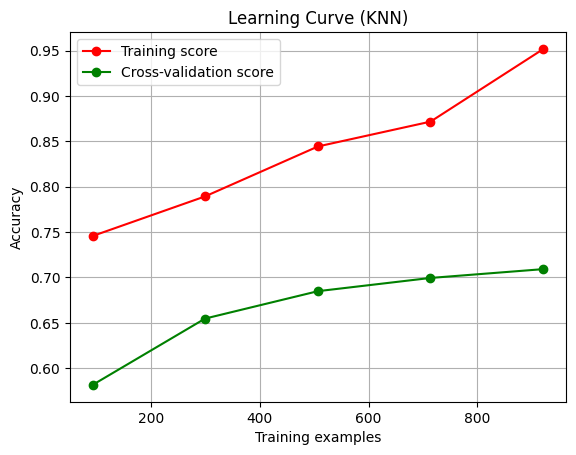

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Menggunakan learning_curve untuk menghitung data train & test
train_sizes, train_scores, test_scores = learning_curve(
    knn, x, y, cv=10, scoring='accuracy')  # cv adalah jumlah lipatan cross-validation

# Menghitung rata-rata dari skor training dan testing
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Membuat plot
plt.figure()
plt.title("Learning Curve (KNN)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot kurva training dan testing score
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Gap pada KNN default diatas sangatlah jauh sehingga modelnya overfit, kita akan coba lakukan hyperparameter tunning supaya modelnya bisa lebih optimal / lebih baik.

### Hyperparameter Tunning untuk KNN secara manual Tunning dalam parameter n_neighbors

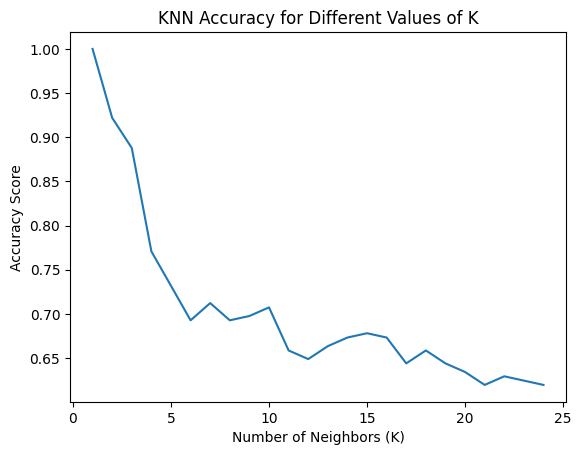

In [ ]:
accuracy_array = []
for k in range(1, 25):
    knn_loop = KNeighborsClassifier(n_neighbors=k)  # Set jumlah n_neighbors
    knn_loop.fit(X_train, y_train)
    y_pred = knn_loop.predict(X_test)
    accuracy_array.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 25), accuracy_array)
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy Score")
plt.title("KNN Accuracy for Different Values of K")
plt.show()

Dari hasil looping hyperparameter n_neighbors diatas, kita bisa pilih nilai neighbors dengan 1 atau 2.

In [ ]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors = 2) #set K neighbor as 2
knn_neighbors.fit(X_train,y_train) #MACHINE LEARNING SEDANG DALAM PROSES BELAJAR
predicted_test_n = knn_neighbors.predict(X_test)
predict_train_n = knn_neighbors.predict(X_train)
print('Accuracy data train neighbors 2 : ', accuracy_score(y_train, predict_train_n))
print('Accuracy data test neighbors 2 : ', accuracy_score(y_test, predicted_test_n))
print('Gap Akurasi neighbors 2 data train dengan data test : ', abs((accuracy_score(y_train, predict_train_n)) -accuracy_score(y_test, predicted_test_n)))

Accuracy data train neighbors 2 :  0.9902439024390244
Accuracy data test neighbors 2 :  0.9219512195121952
Gap Akurasi neighbors 2 data train dengan data test :  0.06829268292682922


Gap antara akurasi untuk neighbors 2 pada data train dan test untuk Model KNN didapat gapnya hanya 6,829 % sehingga modelnya bisa disimpulkan sudah optimal.

### Cross Validation and Learning Curve Untuk KNN setelah dilakukan hyperparameter tunning pada n_neighbors

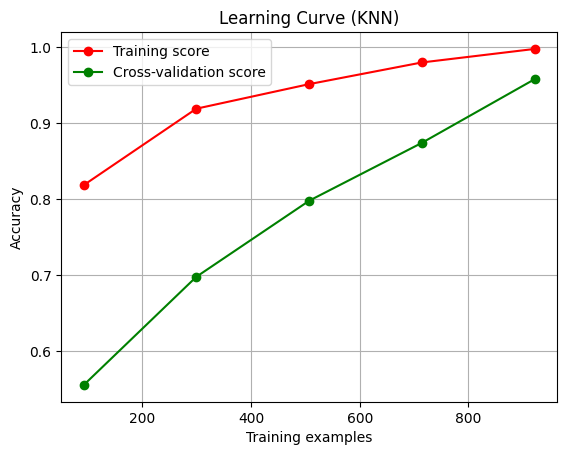

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Menggunakan learning_curve untuk menghitung data train & test
train_sizes, train_scores, test_scores = learning_curve(
    knn_neighbors, x, y, cv=10, scoring='accuracy')  # cv adalah jumlah lipatan cross-validation

# Menghitung rata-rata dari skor training dan testing
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Membuat plot
plt.figure()
plt.title("Learning Curve (KNN)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot kurva training dan testing score
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## Ingin lebih tahu untuk melihat model evaluasi confusion matrix lainnya selain akurasi

## Confusion Matrix untuk KNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def model_evaluation(model, name):
    # Prediksi menggunakan model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Confusion matrix
    confusion_matrix_train = pd.crosstab(y_train, y_train_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

    # Plot confusion matrix
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix_train, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name} (Train)')
    plt.xticks([0.5, 1.5], ['NO', 'YES'], va='center')
    plt.yticks([0.5, 1.5], ['NO', 'YES'], va='center')

    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix_test, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name} (Test)')
    plt.xticks([0.5, 1.5], ['NO', 'YES'], va='center')
    plt.yticks([0.5, 1.5], ['NO', 'YES'], va='center')
    plt.tight_layout()
    plt.show()

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)

    print(f'{name} Metrics (Train):')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Train Precision: {train_precision:.4f}')
    print(f'Train Recall: {train_recall:.4f}')
    print(f'Train F1-score: {train_f1:.4f}')
    print(f'Train ROC-AUC: {train_roc_auc:.4f}')

    print(f'\n{name} Metrics (Test):')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Precision: {test_precision:.4f}')
    print(f'Test Recall: {test_recall:.4f}')
    print(f'Test F1-score: {test_f1:.4f}')
    print(f'Test ROC-AUC: {test_roc_auc:.4f}')

    print(f'\n{name} Gap Score:')
    print(f'Gap Accuracy: {abs(train_accuracy - test_accuracy):.4f}')
    print(f'Gap Precision: {abs(train_precision - test_precision):.4f}')
    print(f'Gap Recall: {abs(train_recall - test_recall):.4f}')
    print(f'Gap F1-Score: {abs(train_f1 - test_f1):.4f}')
    print(f'Gap ROC-AUC: {abs(train_roc_auc - test_roc_auc):.4f}')

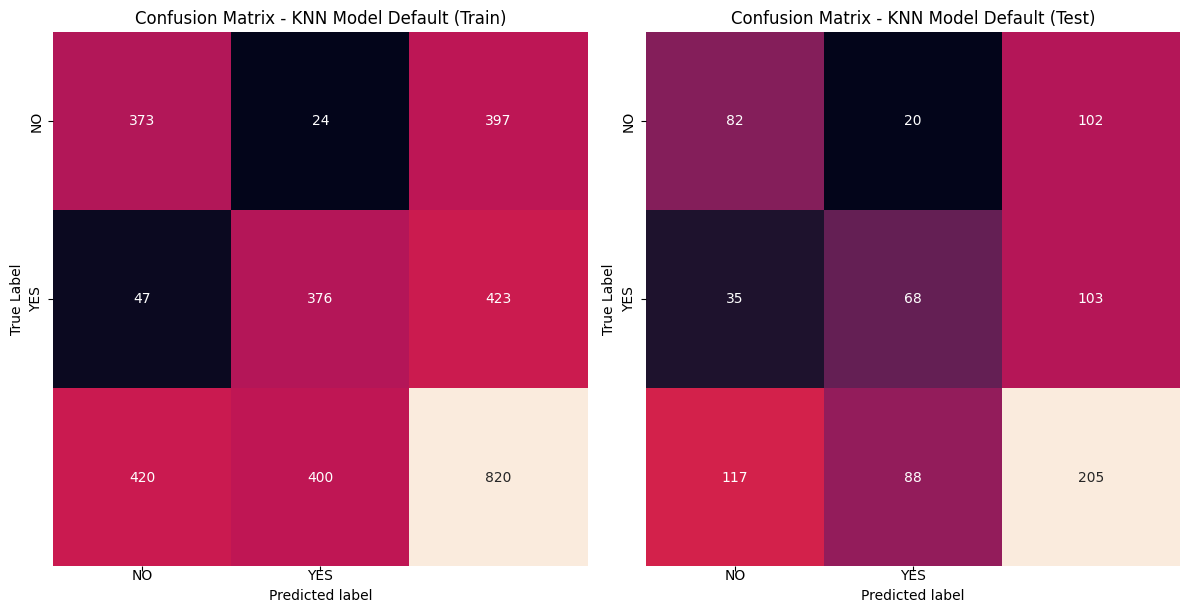

KNN Model Default Metrics (Train):
Train Accuracy: 0.9134
Train Precision: 0.9400
Train Recall: 0.8889
Train F1-score: 0.9137
Train ROC-AUC: 0.9142

KNN Model Default Metrics (Test):
Test Accuracy: 0.7317
Test Precision: 0.7727
Test Recall: 0.6602
Test F1-score: 0.7120
Test ROC-AUC: 0.7321

KNN Model Default Gap Score:
Gap Accuracy: 0.1817
Gap Precision: 0.1673
Gap Recall: 0.2287
Gap F1-Score: 0.2017
Gap ROC-AUC: 0.1822


In [ ]:
# Memanggil fungsi model_evaluation untuk model KNN default
model_evaluation(knn, "KNN Model Default")

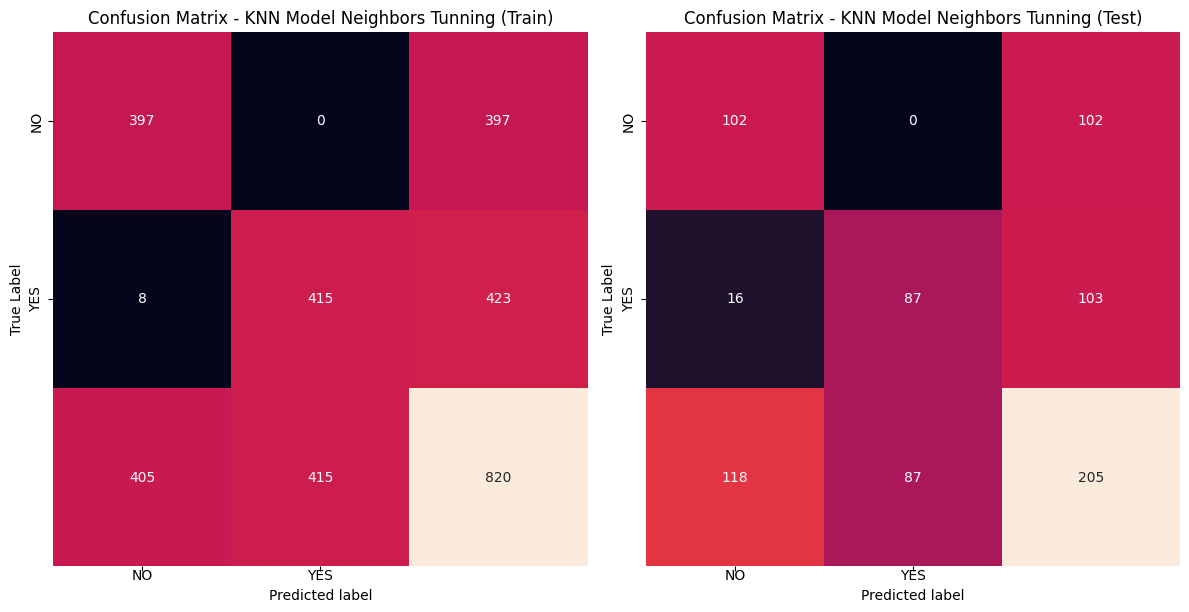

KNN Model Neighbors Tunning Metrics (Train):
Train Accuracy: 0.9902
Train Precision: 1.0000
Train Recall: 0.9811
Train F1-score: 0.9905
Train ROC-AUC: 0.9905

KNN Model Neighbors Tunning Metrics (Test):
Test Accuracy: 0.9220
Test Precision: 1.0000
Test Recall: 0.8447
Test F1-score: 0.9158
Test ROC-AUC: 0.9223

KNN Model Neighbors Tunning Gap Score:
Gap Accuracy: 0.0683
Gap Precision: 0.0000
Gap Recall: 0.1364
Gap F1-Score: 0.0747
Gap ROC-AUC: 0.0682


In [ ]:
# Memanggil fungsi model_evaluation untuk model KNN Tunning
model_evaluation(knn_neighbors, "KNN Model Neighbors Tunning")

Berdasarkan confusion matriks pada data test yang diperoleh bahwa :
* True Positive (TP) : dalam hal ini memprediksi pasien positive terkena penyakit jantung dan memang benar pasien tersebut positif terkena penyakit jantung, dengan nilai TP nya ialah 87.
* True Negative (TN) : dalam hal ini memprediksi pasien negatif terkena penyakit jantung dan memang benar pasien tersebut tidak terkena penyakit jantung, dengan nilai TN nya ialah 102.
* False Positive (FP) : dalam hal ini memprediksi pasien positif terkena penyakit jantung dan ternyata prediksinya salah, ternyata pasien tersebut tidak terkena penyakit jantung, dengan nilai FP nya ialah 0.
* False Negative (FN) : dalam hal ini memprediksi pasien negatif (tidak terkena penyakit jantung) dan ternyata prediksinya itu salah, ternyata pasien tersebut positif terkena penyakit jantung, dengan nilai FN nya ialah 16.

## 2. Logistic Regression

In [ ]:
# Logistic regression classification
import warnings
from sklearn.exceptions import ConvergenceWarning

# Mengabaikan ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
predicted_test_lr = lr_model.predict(X_test)
predict_train_lr = lr_model.predict(X_train)
print('Accuracy data train : ', accuracy_score(y_train, predict_train_lr))
print('Accuracy data test : ', accuracy_score(y_test, predicted_test_lr))
print('Gap Akurasi data train dengan data test : ', abs((accuracy_score(y_train, predict_train_lr)) -accuracy_score(y_test, predicted_test_lr)))

Accuracy data train :  0.8304878048780487
Accuracy data test :  0.7658536585365854
Gap Akurasi data train dengan data test :  0.06463414634146336


### Cross Validation and Learning Curve Untuk Logistic Regression

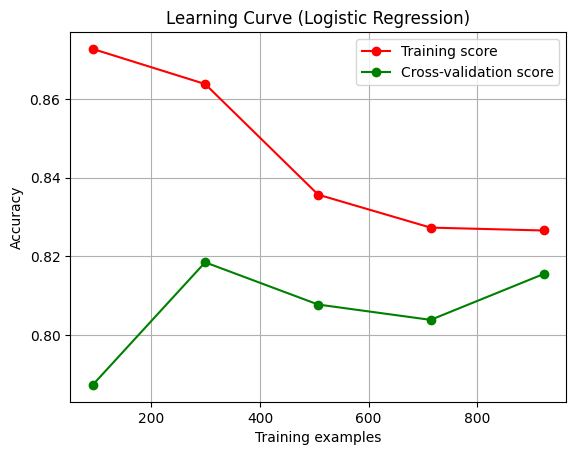

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Menggunakan learning_curve untuk menghitung data train & test
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, x, y, cv=10, scoring='accuracy')  # cv adalah jumlah lipatan cross-validation

# Menghitung rata-rata dari skor training dan testing
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Membuat plot
plt.figure()
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot kurva training dan testing score
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Dari hasil diatas, model logistic regression pada learning curve disimpulkan bahwa modelnya underfitting karena pada data train menurun nilai akurasinya seiring bertambahnya iterasi data. Sehingga akan dilakukan proses hyperparameter tunning dengan harapan bisa lebih optimal.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid untuk Logistic Regression
param_grid = {
    'penalty': ['l2', None],
    'random_state': range(1, 10)  # Misalnya, menggunakan rentang 10 integer dari 0 hingga 9
}

# Inisialisasi model Logistic Regression
logistic_regression = LogisticRegression()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', error_score='raise')

# Melatih model dengan menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Mendapatkan kombinasi parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Menggunakan model terbaik untuk memprediksi data test
lr_best_model = grid_search.best_estimator_

predict_best_lr_test = lr_best_model.predict(X_test)
predict_best_lr_train = lr_best_model.predict(X_train)
print('Accuracy data train : ', accuracy_score(y_train, predict_best_lr_train))
print('Accuracy data test : ', accuracy_score(y_test, predict_best_lr_test))
print('Gap Akurasi data train dengan data test : ', abs((accuracy_score(y_train, predict_best_lr_train)) -accuracy_score(y_test, predict_best_lr_test)))


Best Parameters: {'penalty': None, 'random_state': 1}
Accuracy data train :  0.8304878048780487
Accuracy data test :  0.7658536585365854
Gap Akurasi data train dengan data test :  0.06463414634146336


### Cross Validation and Learning Curve Untuk Logistic Regression Hyperparameter Tunning

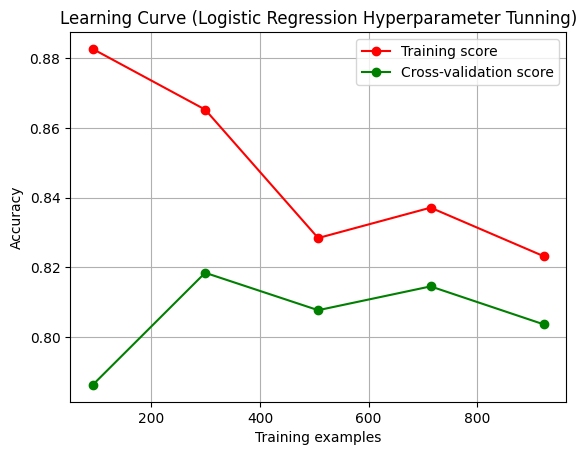

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Menggunakan learning_curve untuk menghitung data train & test
train_sizes, train_scores, test_scores = learning_curve(
    lr_best_model, x, y, cv=10, scoring='accuracy')  # cv adalah jumlah lipatan cross-validation

# Menghitung rata-rata dari skor training dan testing
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Membuat plot
plt.figure()
plt.title("Learning Curve (Logistic Regression Hyperparameter Tunning)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot kurva training dan testing score
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Setelah dilakukan hyperparameter tunning pada logistic regression ternyata hasilnya tetap underfitting, hal ini karena variasi nilai parameternya belum optimal. Sehingga untuk model ini pada variasi tersebut belum cocok untuk digunakan dalam memprediksi.

## Confusion Matrix untuk Logistic Regression

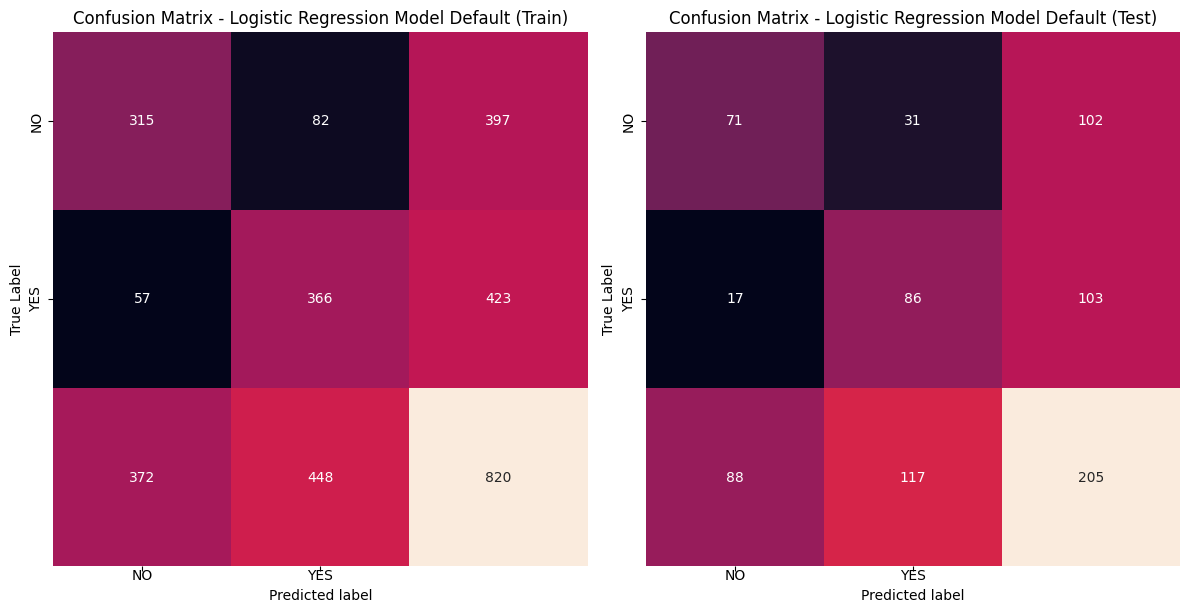

Logistic Regression Model Default Metrics (Train):
Train Accuracy: 0.8305
Train Precision: 0.8170
Train Recall: 0.8652
Train F1-score: 0.8404
Train ROC-AUC: 0.8293

Logistic Regression Model Default Metrics (Test):
Test Accuracy: 0.7659
Test Precision: 0.7350
Test Recall: 0.8350
Test F1-score: 0.7818
Test ROC-AUC: 0.7655

Logistic Regression Model Default Gap Score:
Gap Accuracy: 0.0646
Gap Precision: 0.0819
Gap Recall: 0.0303
Gap F1-Score: 0.0586
Gap ROC-AUC: 0.0638


In [ ]:
# Memanggil fungsi model_evaluation untuk model Logistic Regression default
model_evaluation(lr_model, "Logistic Regression Model Default")

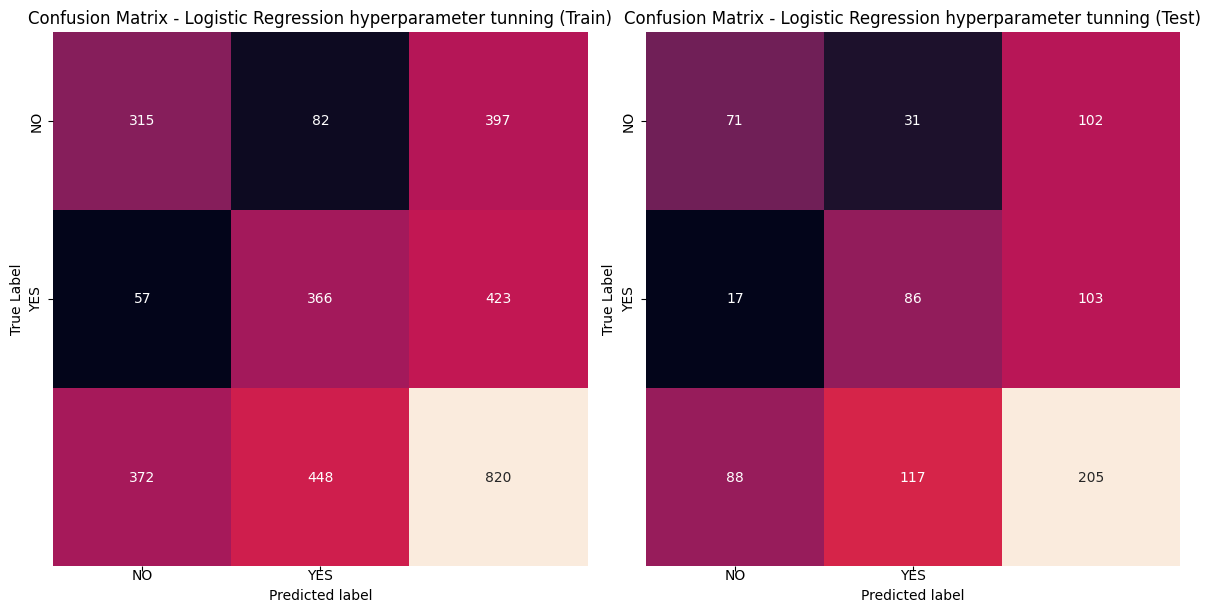

Logistic Regression hyperparameter tunning Metrics (Train):
Train Accuracy: 0.8305
Train Precision: 0.8170
Train Recall: 0.8652
Train F1-score: 0.8404
Train ROC-AUC: 0.8293

Logistic Regression hyperparameter tunning Metrics (Test):
Test Accuracy: 0.7659
Test Precision: 0.7350
Test Recall: 0.8350
Test F1-score: 0.7818
Test ROC-AUC: 0.7655

Logistic Regression hyperparameter tunning Gap Score:
Gap Accuracy: 0.0646
Gap Precision: 0.0819
Gap Recall: 0.0303
Gap F1-Score: 0.0586
Gap ROC-AUC: 0.0638


In [ ]:
# Memanggil fungsi model_evaluation untuk model Logistic Regression hyperparameter tunning
model_evaluation(lr_best_model, "Logistic Regression hyperparameter tunning")

Berdasarkan confusion matriks pada data test yang diperoleh bahwa :
* True Positive (TP) : dalam hal ini memprediksi pasien positive terkena penyakit jantung dan memang benar pasien tersebut positif terkena penyakit jantung, dengan nilai TP nya ialah 86.
* True Negative (TN) : dalam hal ini memprediksi pasien negatif terkena penyakit jantung dan memang benar pasien tersebut tidak terkena penyakit jantung, dengan nilai TN nya ialah 71.
* False Positive (FP) : dalam hal ini memprediksi pasien positif terkena penyakit jantung dan ternyata prediksinya salah, ternyata pasien tersebut tidak terkena penyakit jantung, dengan nilai FP nya ialah 31.
* False Negative (FN) : dalam hal ini memprediksi pasien negatif (tidak terkena penyakit jantung) dan ternyata prediksinya itu salah, ternyata pasien tersebut positif terkena penyakit jantung, dengan nilai FN nya ialah 17.

## 3. Decision Tree Classsification

In [ ]:
# Decision Tree Classification
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() # set default
decision_tree.fit(X_train, y_train)
predicted_test = decision_tree.predict(X_test)
predicted_train = decision_tree.predict(X_train)
print('Accuracy data train : ', accuracy_score(y_train, predicted_train))
print('Accuracy data test : ', accuracy_score(y_test, predicted_test))
print('Gap Akurasi data train dengan data test : ', abs((accuracy_score(y_train, predicted_train)) - accuracy_score(y_test, predicted_test)))


Accuracy data train :  1.0
Accuracy data test :  0.9853658536585366
Gap Akurasi data train dengan data test :  0.014634146341463428


## Cross Validation dan Learning Curve untuk Decision Tree Clasification

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


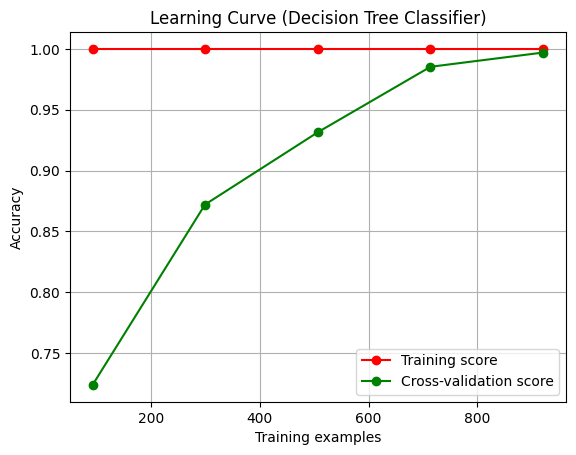

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Cross-validation
cv_scores = cross_val_score(dt_model, x, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    dt_model, x, y, cv=10, scoring='accuracy')

# Menghitung rata-rata dari skor training dan testing
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Membuat plot
plt.figure()
plt.title("Learning Curve (Decision Tree Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot kurva training dan testing score
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


## Hyperparameter Tunning untuk Decision Tree secara manual Tunning dalam parameter splitter{“best”, “random”}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Parameter grid untuk Decision Tree Classifier
param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15]  # Misalnya, menggunakan rentang nilai max_depth
}

# Inisialisasi model Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', error_score='raise')

# Melatih model dengan menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Mendapatkan kombinasi parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Menggunakan model terbaik untuk memprediksi data test
best_decision_tree_model = grid_search.best_estimator_

predict_best_dt_test = best_decision_tree_model.predict(X_test)
predict_best_dt_train = best_decision_tree_model.predict(X_train)
print('Accuracy data train : ', accuracy_score(y_train, predict_best_dt_train))
print('Accuracy data test : ', accuracy_score(y_test, predict_best_dt_test))
print('Gap Akurasi data train dengan data test : ', abs(accuracy_score(y_train, predict_best_dt_train) - accuracy_score(y_test, predict_best_dt_test)))


Best Parameters: {'max_depth': 10, 'splitter': 'random'}
Accuracy data train :  1.0
Accuracy data test :  0.9853658536585366
Gap Akurasi data train dengan data test :  0.014634146341463428


Berdasarkan output di atas, setelah melakukan hyperparameter tunning hasilnya lebih baik menggunakan yang default (tanpa hyperparameter tunning) karena nilai gap akurasi data train dengan data test nya lebih optimal saat menggunakan yang default, jadi hyperparameter tunning pada model Decision Tree Clasification tidak digunakan.

## Cross Validation dan Learning Curve setelah dilakukan Hyperparameter Tunning

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


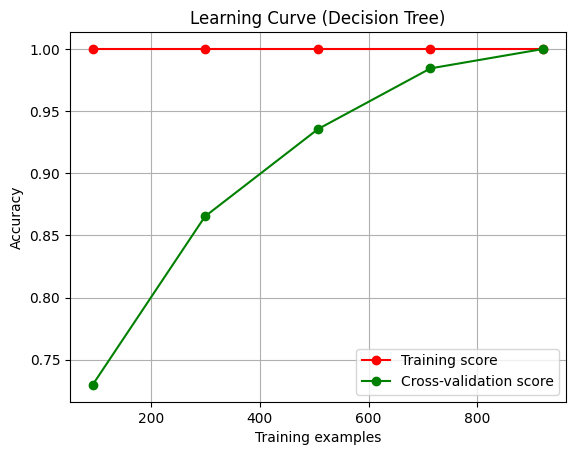

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Define the parameters grid for hyperparameter tuning
param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(decision_tree, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x, y)

# Get the best model from GridSearchCV
best_decision_tree_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_decision_tree_model, x, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_decision_tree_model, x, y, cv=10, scoring='accuracy')

# Calculate the mean training and testing scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot the training and testing score curves
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## Confusion Matrix untuk Decision Tree Model

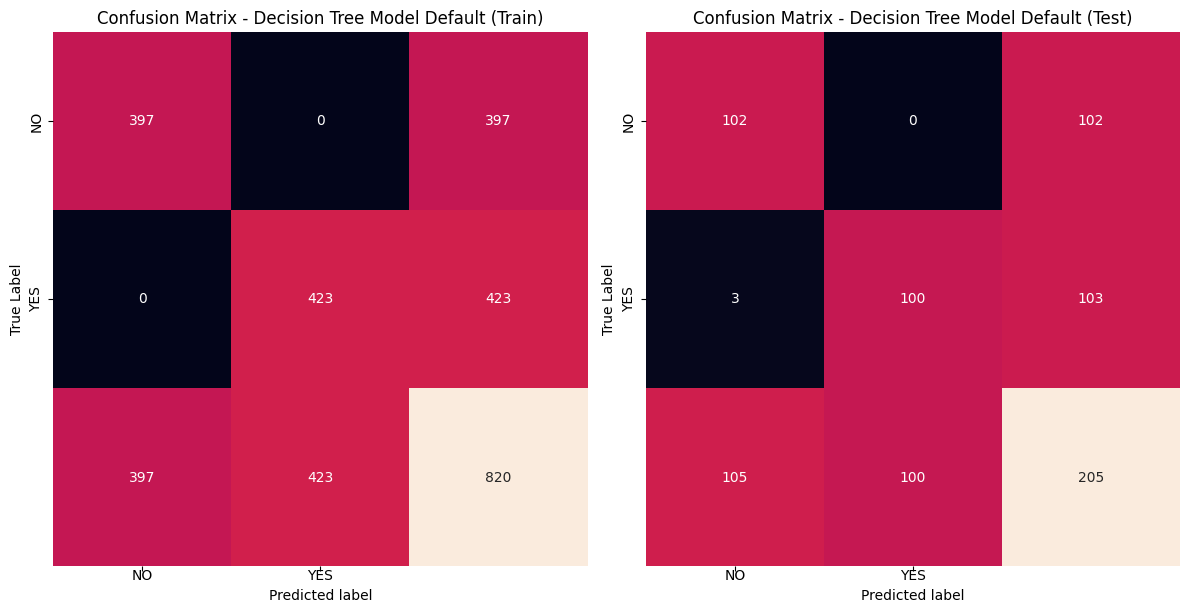

Decision Tree Model Default Metrics (Train):
Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1-score: 1.0000
Train ROC-AUC: 1.0000

Decision Tree Model Default Metrics (Test):
Test Accuracy: 0.9854
Test Precision: 1.0000
Test Recall: 0.9709
Test F1-score: 0.9852
Test ROC-AUC: 0.9854

Decision Tree Model Default Gap Score:
Gap Accuracy: 0.0146
Gap Precision: 0.0000
Gap Recall: 0.0291
Gap F1-Score: 0.0148
Gap ROC-AUC: 0.0146


In [ ]:
# Memanggil fungsi model_evaluation untuk model Decision Tree default
decision_tree.fit(X_train, y_train)  # Melatih model dengan data train
model_evaluation(decision_tree, "Decision Tree Model Default")

Berdasarkan confusion matriks pada data test yang diperoleh bahwa :
* True Positive (TP) : dalam hal ini memprediksi pasien positive terkena penyakit jantung dan memang benar pasien tersebut positif terkena penyakit jantung, dengan nilai TP nya ialah 100.
* True Negative (TN) : dalam hal ini memprediksi pasien negatif terkena penyakit jantung dan memang benar pasien tersebut tidak terkena penyakit jantung, dengan nilai TN nya ialah 102.
* False Positive (FP) : dalam hal ini memprediksi pasien positif terkena penyakit jantung dan ternyata prediksinya salah, ternyata pasien tersebut tidak terkena penyakit jantung, dengan nilai FP nya ialah 0.
* False Negative (FN) : dalam hal ini memprediksi pasien negatif (tidak terkena penyakit jantung) dan ternyata prediksinya itu salah, ternyata pasien tersebut positif terkena penyakit jantung, dengan nilai FN nya ialah 3.

## 4. Random Forest

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest Classifier
rf_model = RandomForestClassifier()  # Menggunakan parameter default

# Melatih model menggunakan data training
rf_model.fit(X_train, y_train)

# Memprediksi label untuk data train dan data test
predicted_train_rf = rf_model.predict(X_train)
predicted_test_rf = rf_model.predict(X_test)

# Menghitung akurasi untuk data train dan data test
accuracy_train_rf = accuracy_score(y_train, predicted_train_rf)
accuracy_test_rf = accuracy_score(y_test, predicted_test_rf)

# Menampilkan hasil akurasi
print('Accuracy data train:', accuracy_train_rf)
print('Accuracy data test:', accuracy_test_rf)
print('Gap Akurasi data train dengan data test:', abs(accuracy_train_rf - accuracy_test_rf))

Accuracy data train: 1.0
Accuracy data test: 0.9853658536585366
Gap Akurasi data train dengan data test: 0.014634146341463428


## Cross Validation dan Learning Curve untuk Random Forest

Cross-validation scores: [1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]
Mean CV accuracy: 0.9970588235294118


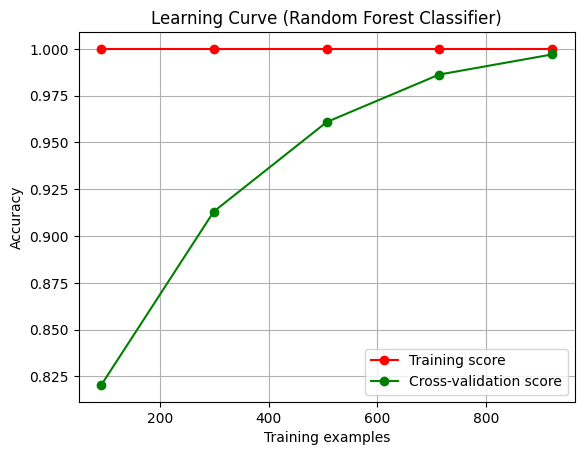

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest Classifier
rf_model = RandomForestClassifier()

# Cross-validation
cv_scores = cross_val_score(rf_model, x, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, x, y, cv=10, scoring='accuracy')

# Menghitung rata-rata dari skor training dan testing
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Membuat plot
plt.figure()
plt.title("Learning Curve (Random Forest Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot kurva training dan testing score
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


## Hyperparameter Tunning untuk Random Forest dengan parameter n_estimators : int dan min_samples_leaf : int or float

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Parameter grid untuk Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 150],  # Misalnya, menggunakan beberapa nilai untuk n_estimators
    'min_samples_leaf': [1, 5, 10]  # Misalnya, menggunakan beberapa nilai untuk min_samples_leaf
}

# Inisialisasi model Random Forest Classifier
random_forest = RandomForestClassifier()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', error_score='raise')

# Melatih model dengan menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Mendapatkan kombinasi parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Menggunakan model terbaik untuk memprediksi data test
best_random_forest_model = grid_search.best_estimator_

predict_best_rf_test = best_random_forest_model.predict(X_test)
predict_best_rf_train = best_random_forest_model.predict(X_train)
print('Accuracy data train : ', accuracy_score(y_train, predict_best_rf_train))
print('Accuracy data test : ', accuracy_score(y_test, predict_best_rf_test))
print('Gap Akurasi data train dengan data test : ', abs(accuracy_score(y_train, predict_best_rf_train) - accuracy_score(y_test, predict_best_rf_test)))


Best Parameters: {'min_samples_leaf': 1, 'n_estimators': 50}
Accuracy data train :  1.0
Accuracy data test :  0.9853658536585366
Gap Akurasi data train dengan data test :  0.014634146341463428


Berdasarkan output setelah dilakukannya hyperparameter tunning untuk random forest model, hasilnya adalah tetap seperti default, maka untuk random forest model tidak perlu dilakukan hyperparameter tunning.

## Confusion Matrix untuk Random Forest Model

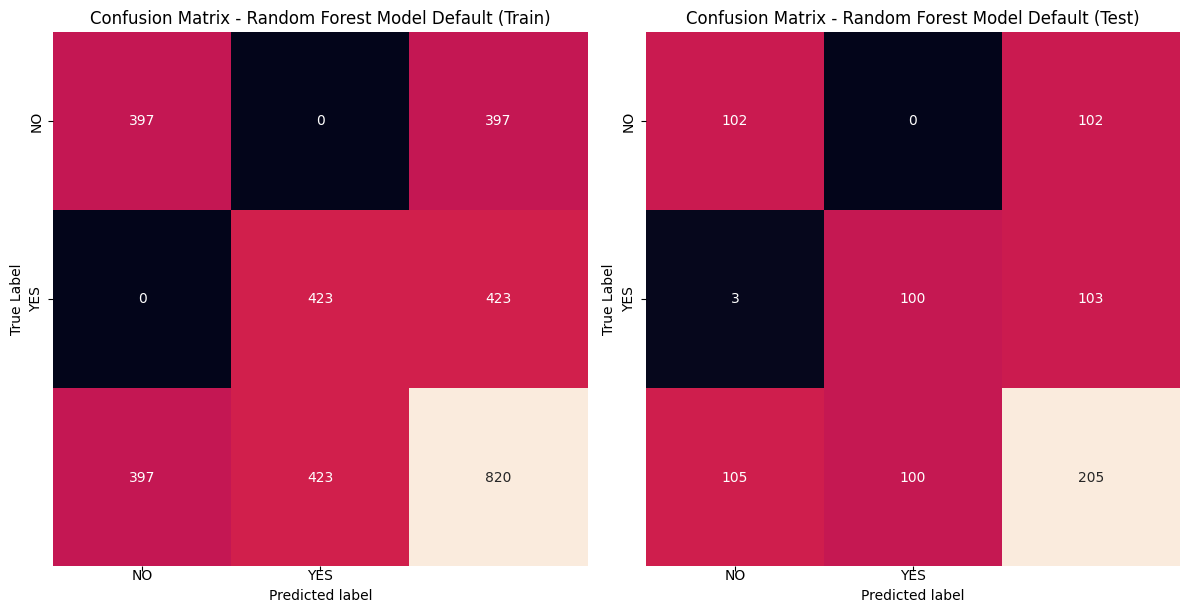

Random Forest Model Default Metrics (Train):
Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1-score: 1.0000
Train ROC-AUC: 1.0000

Random Forest Model Default Metrics (Test):
Test Accuracy: 0.9854
Test Precision: 1.0000
Test Recall: 0.9709
Test F1-score: 0.9852
Test ROC-AUC: 0.9854

Random Forest Model Default Gap Score:
Gap Accuracy: 0.0146
Gap Precision: 0.0000
Gap Recall: 0.0291
Gap F1-Score: 0.0148
Gap ROC-AUC: 0.0146


In [ ]:
# Memanggil fungsi model_evaluation untuk model Random Forest default
rf_model.fit(X_train, y_train)  # Melatih model dengan data train
model_evaluation(rf_model, "Random Forest Model Default")

Berdasarkan confusion matriks pada data test yang diperoleh bahwa :
* True Positive (TP) : dalam hal ini memprediksi pasien positive terkena penyakit jantung dan memang benar pasien tersebut positif terkena penyakit jantung, dengan nilai TP nya ialah 100.
* True Negative (TN) : dalam hal ini memprediksi pasien negatif terkena penyakit jantung dan memang benar pasien tersebut tidak terkena penyakit jantung, dengan nilai TN nya ialah 102.
* False Positive (FP) : dalam hal ini memprediksi pasien positif terkena penyakit jantung dan ternyata prediksinya salah, ternyata pasien tersebut tidak terkena penyakit jantung, dengan nilai FP nya ialah 0.
* False Negative (FN) : dalam hal ini memprediksi pasien negatif (tidak terkena penyakit jantung) dan ternyata prediksinya itu salah, ternyata pasien tersebut positif terkena penyakit jantung, dengan nilai FN nya ialah 3.

## 5. Gaussian Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes (Gaussian)
gnb_model = GaussianNB()

# Melatih model menggunakan data training
gnb_model.fit(X_train, y_train)

# Memprediksi label untuk data train dan data test
predicted_train_gnb = gnb_model.predict(X_train)
predicted_test_gnb = gnb_model.predict(X_test)

# Menghitung akurasi untuk data train dan data test
accuracy_train_gnb = accuracy_score(y_train, predicted_train_gnb)
accuracy_test_gnb = accuracy_score(y_test, predicted_test_gnb)

# Menampilkan hasil akurasi
print('Accuracy data train:', accuracy_train_gnb)
print('Accuracy data test:', accuracy_test_gnb)
print('Gap Akurasi data train dengan data test:', abs(accuracy_train_gnb - accuracy_test_gnb))

Accuracy data train: 0.8256097560975609
Accuracy data test: 0.7853658536585366
Gap Akurasi data train dengan data test: 0.040243902439024315


## Cross Validation dan Learning Curve untuk Gaussian Naive Bayes

Cross-validation scores: [0.83495146 0.87378641 0.83495146 0.7961165  0.80582524 0.87254902
 0.78431373 0.80392157 0.75490196 0.80392157]
Mean CV accuracy: 0.816523891109842


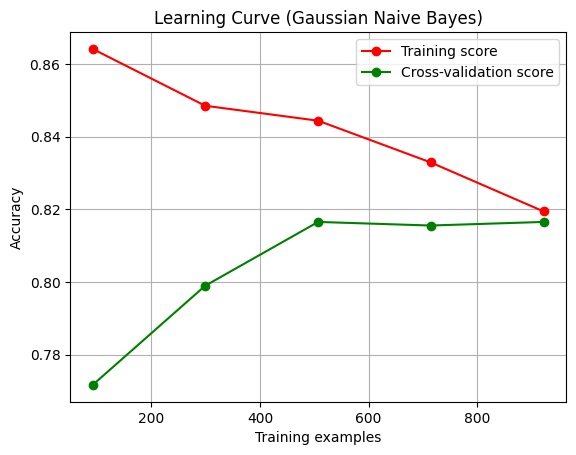

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Gaussian Naive Bayes
gnb_model = GaussianNB()

# Cross-validation
cv_scores = cross_val_score(gnb_model, x, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gnb_model, x, y, cv=10, scoring='accuracy')

# Menghitung rata-rata dari skor training dan testing
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Membuat plot
plt.figure()
plt.title("Learning Curve (Gaussian Naive Bayes)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot kurva training dan testing score
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


Hasil dari Cross Validation dan Learning Curve untuk Gaussian Naive Bayes ialah underfitting, karena seiring bertambahnya data performa training score nya itu turun, padahal ketika datanya sedikit performa training score nya tinggi.

## Hyperparameter Tunning untuk Gaussian Naive Bayes dengan parameter priorsarray-like of shape (n_classes,), default=None

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Parameter grid untuk Gaussian Naive Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Misalnya, menggunakan beberapa nilai untuk var_smoothing
}

# Inisialisasi model Gaussian Naive Bayes
gnb_model = GaussianNB()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(gnb_model, param_grid, cv=5, scoring='accuracy', error_score='raise')

# Melatih model dengan menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Mendapatkan kombinasi parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Menggunakan model terbaik untuk memprediksi data test
best_gnb_model = grid_search.best_estimator_

predict_best_gnb_test = best_gnb_model.predict(X_test)
predict_best_gnb_train = best_gnb_model.predict(X_train)
print('Accuracy data train : ', accuracy_score(y_train, predict_best_gnb_train))
print('Accuracy data test : ', accuracy_score(y_test, predict_best_gnb_test))
print('Gap Akurasi data train dengan data test : ', abs(accuracy_score(y_train, predict_best_gnb_train) - accuracy_score(y_test, predict_best_gnb_test)))

Best Parameters: {'var_smoothing': 1e-09}
Accuracy data train :  0.8256097560975609
Accuracy data test :  0.7853658536585366
Gap Akurasi data train dengan data test :  0.040243902439024315


Setelah dilakukan hyperparameter tunning pada Gaussian Naive Bayes model ternyata hasilnya tetap underfitting, hal ini karena variasi nilai parameternya belum optimal. Sehingga untuk model ini pada variasi tersebut belum cocok untuk digunakan dalam memprediksi.

## Confusion Matrix untuk Gaussian Naive Bayes Model

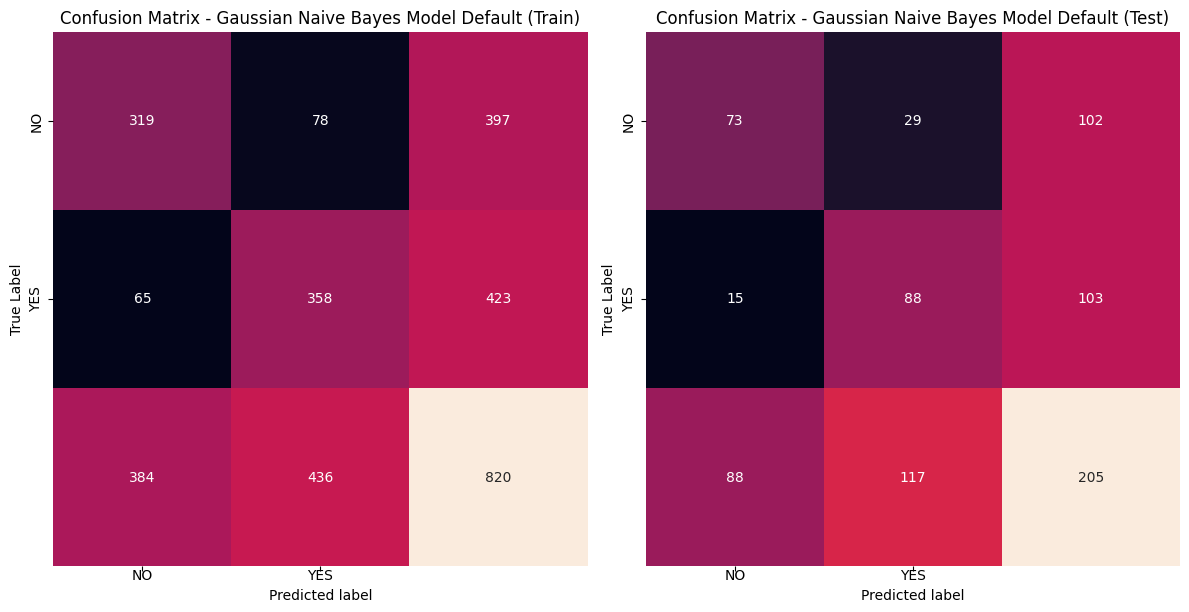

Gaussian Naive Bayes Model Default Metrics (Train):
Train Accuracy: 0.8256
Train Precision: 0.8211
Train Recall: 0.8463
Train F1-score: 0.8335
Train ROC-AUC: 0.8249

Gaussian Naive Bayes Model Default Metrics (Test):
Test Accuracy: 0.7854
Test Precision: 0.7521
Test Recall: 0.8544
Test F1-score: 0.8000
Test ROC-AUC: 0.7850

Gaussian Naive Bayes Model Default Gap Score:
Gap Accuracy: 0.0402
Gap Precision: 0.0690
Gap Recall: 0.0080
Gap F1-Score: 0.0335
Gap ROC-AUC: 0.0399


In [ ]:
# Memanggil fungsi model_evaluation untuk model Random Forest default
gnb_model.fit(X_train, y_train)  # Melatih model dengan data train
model_evaluation(gnb_model, "Gaussian Naive Bayes Model Default")

Berdasarkan confusion matriks pada data test yang diperoleh bahwa :
* True Positive (TP) : dalam hal ini memprediksi pasien positive terkena penyakit jantung dan memang benar pasien tersebut positif terkena penyakit jantung, dengan nilai TP nya ialah 88.
* True Negative (TN) : dalam hal ini memprediksi pasien negatif terkena penyakit jantung dan memang benar pasien tersebut tidak terkena penyakit jantung, dengan nilai TN nya ialah 73.
* False Positive (FP) : dalam hal ini memprediksi pasien positif terkena penyakit jantung dan ternyata prediksinya salah, ternyata pasien tersebut tidak terkena penyakit jantung, dengan nilai FP nya ialah 29.
* False Negative (FN) : dalam hal ini memprediksi pasien negatif (tidak terkena penyakit jantung) dan ternyata prediksinya itu salah, ternyata pasien tersebut positif terkena penyakit jantung, dengan nilai FN nya ialah 15.

# 6. Gradient Boosting Classifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()

# Melatih model menggunakan data training
gbc_model.fit(X_train, y_train)

# Memprediksi label untuk data train dan data test
predicted_train_gbc = gbc_model.predict(X_train)
predicted_test_gbc = gbc_model.predict(X_test)

# Menghitung akurasi untuk data train dan data test
accuracy_train_gbc = accuracy_score(y_train, predicted_train_gbc)
accuracy_test_gbc = accuracy_score(y_test, predicted_test_gbc)

# Menampilkan hasil akurasi
print('Accuracy data train:', accuracy_train_gbc)
print('Accuracy data test:', accuracy_test_gbc)
print('Gap Akurasi data train dengan data test:', abs(accuracy_train_gbc - accuracy_test_gbc))

Accuracy data train: 0.9914634146341463
Accuracy data test: 0.9512195121951219
Gap Akurasi data train dengan data test: 0.040243902439024426


## Cross Validation dan Learning Curve untuk Gradient Boosting Classifier

Cross-validation scores: [1.         1.         1.         0.98058252 0.95145631 1.
 0.98039216 1.         0.96078431 0.98039216]
Mean CV accuracy: 0.9853607462402436


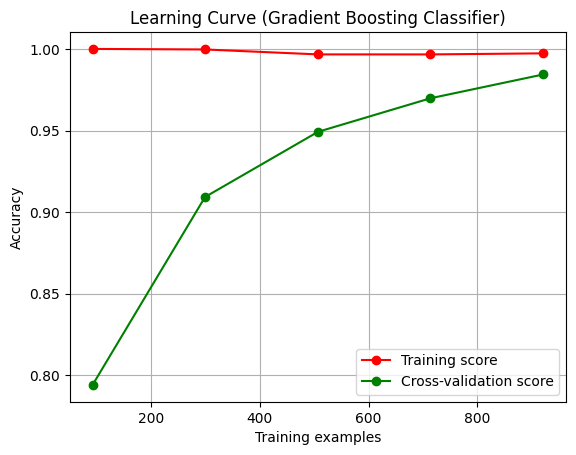

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()

# Cross-validation
cv_scores = cross_val_score(gbc_model, x, y, cv=10, scoring='accuracy')  # Menggunakan gbc_model bukan gnb_model

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gbc_model, x, y, cv=10, scoring='accuracy')  # Menggunakan gbc_model bukan gnb_model

# Menghitung rata-rata dari skor training dan testing
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Membuat plot
plt.figure()
plt.title("Learning Curve (Gradient Boosting Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot kurva training dan testing score
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## Hyperparameter Tunning untuk Gradient Boosting Classifier

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Mengabaikan ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Parameter grid untuk Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],  # Misalnya, menggunakan beberapa nilai untuk n_estimators
    'loss': ['deviance', 'exponential']  # Misalnya, menggunakan dua jenis loss function
}

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy', error_score='raise')

# Melatih model dengan menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Mendapatkan kombinasi parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Menggunakan model terbaik untuk memprediksi data test
best_gb_model = grid_search.best_estimator_

predict_best_gb_test = best_gb_model.predict(X_test)
predict_best_gb_train = best_gb_model.predict(X_train)
print('Accuracy data train : ', accuracy_score(y_train, predict_best_gb_train))
print('Accuracy data test : ', accuracy_score(y_test, predict_best_gb_test))
print('Gap Akurasi data train dengan data test : ', abs(accuracy_score(y_train, predict_best_gb_train) - accuracy_score(y_test, predict_best_gb_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
 

Best Parameters: {'loss': 'deviance', 'n_estimators': 150}
Accuracy data train :  0.998780487804878
Accuracy data test :  0.9707317073170731
Gap Akurasi data train dengan data test :  0.028048780487804903


## Cross Validation dan Learning Curve setelah dilakukan Hyperparameter Tunning

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
 

Cross-validation scores: [1.         1.         1.         1.         0.97087379 1.
 1.         1.         0.97058824 0.98039216]
Mean CV accuracy: 0.992185417856463


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
 

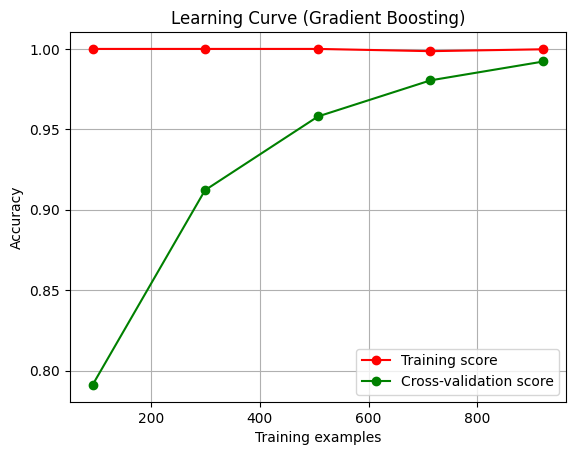

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning

# Mengabaikan ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Setelah selesai, Anda dapat mengembalikan peringatan ke pengaturan awal dengan
warnings.filterwarnings("default", category=ConvergenceWarning)

# Initialize Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier()

# Define the parameters grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'loss': ['deviance', 'exponential']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x, y)

# Get the best model from GridSearchCV
best_gradient_boosting_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_gradient_boosting_model, x, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_gradient_boosting_model, x, y, cv=10, scoring='accuracy')

# Calculate the mean training and testing scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Gradient Boosting)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot the training and testing score curves
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


## Confusion Matrix untuk Gradient Boosting Classifier

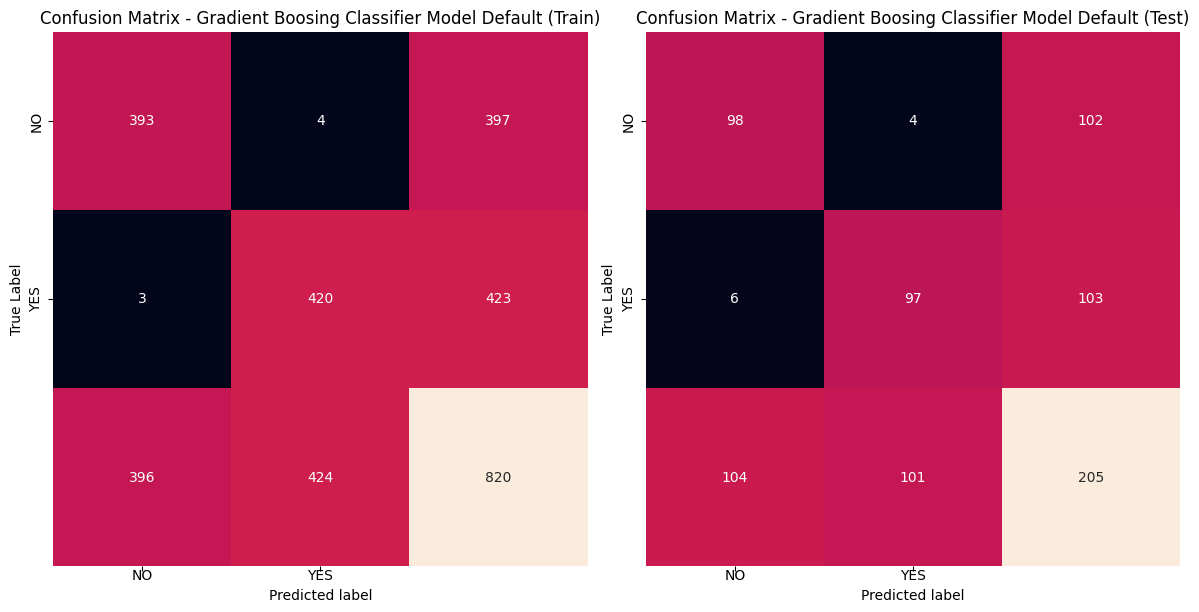

Gradient Boosing Classifier Model Default Metrics (Train):
Train Accuracy: 0.9915
Train Precision: 0.9906
Train Recall: 0.9929
Train F1-score: 0.9917
Train ROC-AUC: 0.9914

Gradient Boosing Classifier Model Default Metrics (Test):
Test Accuracy: 0.9512
Test Precision: 0.9604
Test Recall: 0.9417
Test F1-score: 0.9510
Test ROC-AUC: 0.9513

Gradient Boosing Classifier Model Default Gap Score:
Gap Accuracy: 0.0402
Gap Precision: 0.0302
Gap Recall: 0.0512
Gap F1-Score: 0.0408
Gap ROC-AUC: 0.0402


In [ ]:
# Memanggil fungsi model_evaluation untuk model Gradient Boosting Classifier default
gbc_model.fit(X_train, y_train)  # Melatih model dengan data train
model_evaluation(gbc_model, "Gradient Boosing Classifier Model Default")

Berdasarkan confusion matriks pada data test yang diperoleh bahwa :
* True Positive (TP) : dalam hal ini memprediksi pasien positive terkena penyakit jantung dan memang benar pasien tersebut positif terkena penyakit jantung, dengan nilai TP nya ialah 97.
* True Negative (TN) : dalam hal ini memprediksi pasien negatif terkena penyakit jantung dan memang benar pasien tersebut tidak terkena penyakit jantung, dengan nilai TN nya ialah 98.
* False Positive (FP) : dalam hal ini memprediksi pasien positif terkena penyakit jantung dan ternyata prediksinya salah, ternyata pasien tersebut tidak terkena penyakit jantung, dengan nilai FP nya ialah 4.
* False Negative (FN) : dalam hal ini memprediksi pasien negatif (tidak terkena penyakit jantung) dan ternyata prediksinya itu salah, ternyata pasien tersebut positif terkena penyakit jantung, dengan nilai FN nya ialah 6.

# Kesimpulan
Berdasarkan dari 6 model yang telah di training dan di evaluasi didapat model yang terbaik adalah Decision Tree Classifier, Random Forest, Gradient Boosting, dan KNN, karena
* Model baseline sudah baik performa nya, gap nya sangat kecil di bawah 10%.
* Walaupun hasilnya terbaik setelah dilakukannya hyperparameter tunning performa nya tetap meningkat dan optimal.
* Pada grafik learning curve sebelumd an setelah dilakukannya tunning, permorma model pada training score dan cross-validation score memiliki gap yang kecil dan optimal.